In [4]:
from sklearn.datasets import make_classification
from torch import nn, optim
from skorch import NeuralNetClassifier
import numpy  as np
# sys.path.append('./pyperch')
# from pyperch.neural.backprop_nn import BackpropModule
import matplotlib.pyplot as plt
import torch
import random
from ucimlrepo import fetch_ucirepo
from sklearn.metrics import accuracy_score, make_scorer, f1_score, confusion_matrix, log_loss

import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from pipelines import KMeans_pipeline, TSNE_pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import helpers
import importlib
import pipelines
import pipeline_helpers
import seaborn as sns
from scipy.stats import kurtosis
import generate_data
# Modify your helpers module code outside of Jupyter Notebook or in another cell

# Reload the helpers module to get the latest changes
def reload_all():
  importlib.reload(helpers)
  importlib.reload(pipelines)
  importlib.reload(pipeline_helpers)
  importlib.reload(generate_data)


def generate_seed():
  np.random.seed(42)
  random.seed(42)
  torch.manual_seed(42)
  
def reload_notebook_cell():
  reload_all()
  generate_seed()

In [6]:
from generate_data import get_and_preprocess_sdas_data, get_and_preprocess_raisin_data, y_label_encode, CATEGORY_COLUMNS_UCML
from sklearn.preprocessing import  LabelEncoder
reload_notebook_cell()

X_train_sdas, X_test_sdas, y_train_sdas, y_test_sdas = get_and_preprocess_sdas_data()
X_train_raisin, X_test_raisin, y_train_raisin, y_test_raisin = get_and_preprocess_raisin_data()

# Initialize and fit LabelEncoder
y_train_encoded_sdas, y_test_encoded_sdas, label_encoder_sdas = y_label_encode(y_train_sdas,y_test_sdas)
y_train_encode_raisin, y_test_encode_raisin, label_encoder_raisin = y_label_encode(y_train_raisin, y_test_raisin)


c:\Users\WarrenKushner\Documents\ML\A3\generate_data.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[(X["Marital Status"]  != 1) & (X["Marital Status"] != 2) & (X["Marital Status"] != 4)]["Marital Status"] = -1


Removed columns: ["encoding__Mother's qualification_18", "encoding__Mother's qualification_44", "encoding__Father's qualification_18", "encoding__Father's occupation_161"]
Number of features after removal: 200


# Investigation in Collinearity 

In [552]:
reload_notebook_cell()



# pipeline_helpers.average_abs_correlation(X_train_sdas)

print( 
      "Baseline of collinearity for SDAS and RAISIN datasets: \n",
      pipeline_helpers.average_abs_correlation(X_train_sdas),pipeline_helpers.average_abs_correlation(X_train_raisin)
)

Baseline of collinearity for SDAS and RAISIN datasets: 
 0.018661698578407947 0.5640929789179703


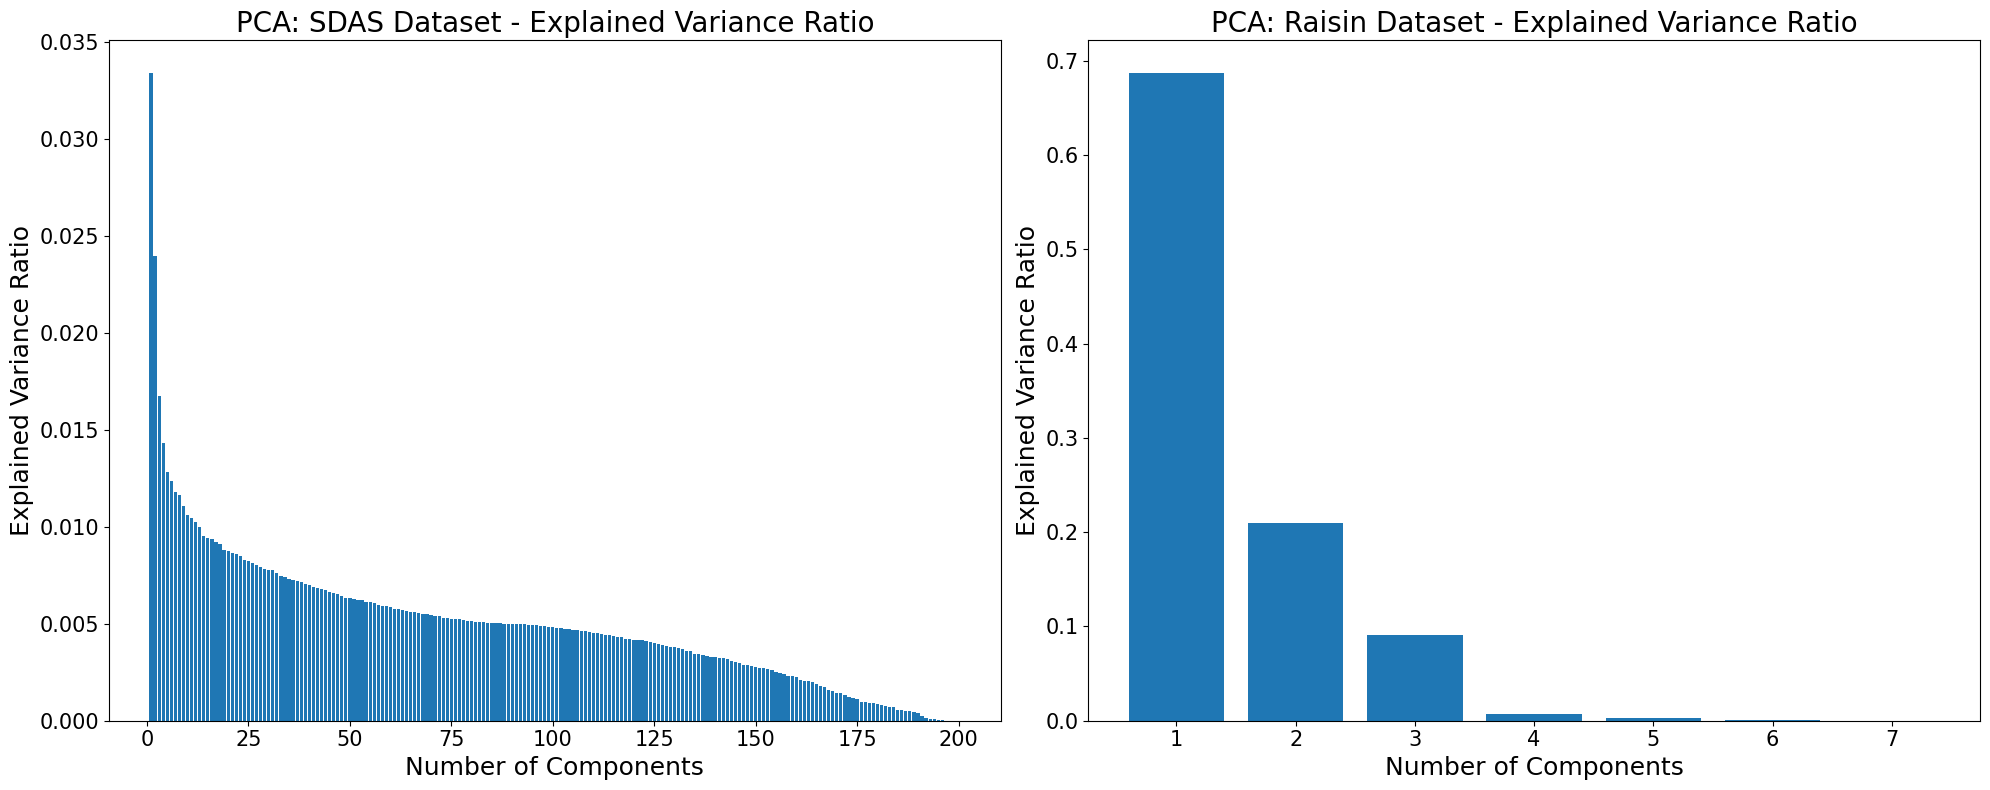

Best number of components for SDAS dataset: 154
Best number of components for Raisin dataset: 3


In [ ]:
reload_all()
generate_seed()

# Fit PCA for SDAS dataset
pca_sdas = pipelines.PCA_pipeline(X_train_sdas, list_of_categories=CATEGORY_COLUMNS_UCML, n_components=None, random_state=42)
pca_sdas.fit(X_train_sdas)
explained_variance_sdas = pca_sdas['classifier'].explained_variance_ratio_

# Fit PCA for Raisin dataset
pca_raisin = pipelines.PCA_pipeline(X_train_raisin, list_of_categories=[], n_components=None, random_state=42   )
pca_raisin.fit(X_train_raisin)
explained_variance_raisin = pca_raisin['classifier'].explained_variance_ratio_


# Plot explained variance for both datasets
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# SDAS dataset
axs[0].bar(range(1, len(explained_variance_sdas) + 1), explained_variance_sdas)
axs[0].set_xlabel('Number of Components')
axs[0].set_ylabel('Explained Variance Ratio')
axs[0].set_title('PCA: SDAS Dataset - Explained Variance Ratio')

# Raisin dataset
axs[1].bar(range(1, len(explained_variance_raisin) + 1), explained_variance_raisin)
axs[1].set_xlabel('Number of Components')
axs[1].set_ylabel('Explained Variance Ratio')
axs[1].set_title('PCA: Raisin Dataset - Explained Variance Ratio')

helpers.increase_font_size_subplots_included(plt)

plt.tight_layout()
plt.show()

# Determine the best number of components for each dataset
cumulative_variance_sdas = np.cumsum(explained_variance_sdas)
cumulative_variance_raisin = np.cumsum(explained_variance_raisin)

best_n_components_sdas = np.argmax(cumulative_variance_sdas >= 0.95) + 1
best_n_components_raisin = np.argmax(cumulative_variance_raisin >= 0.9) + 1

print(f"Best number of components for SDAS dataset: {best_n_components_sdas}")
print(f"Best number of components for Raisin dataset: {best_n_components_raisin}")


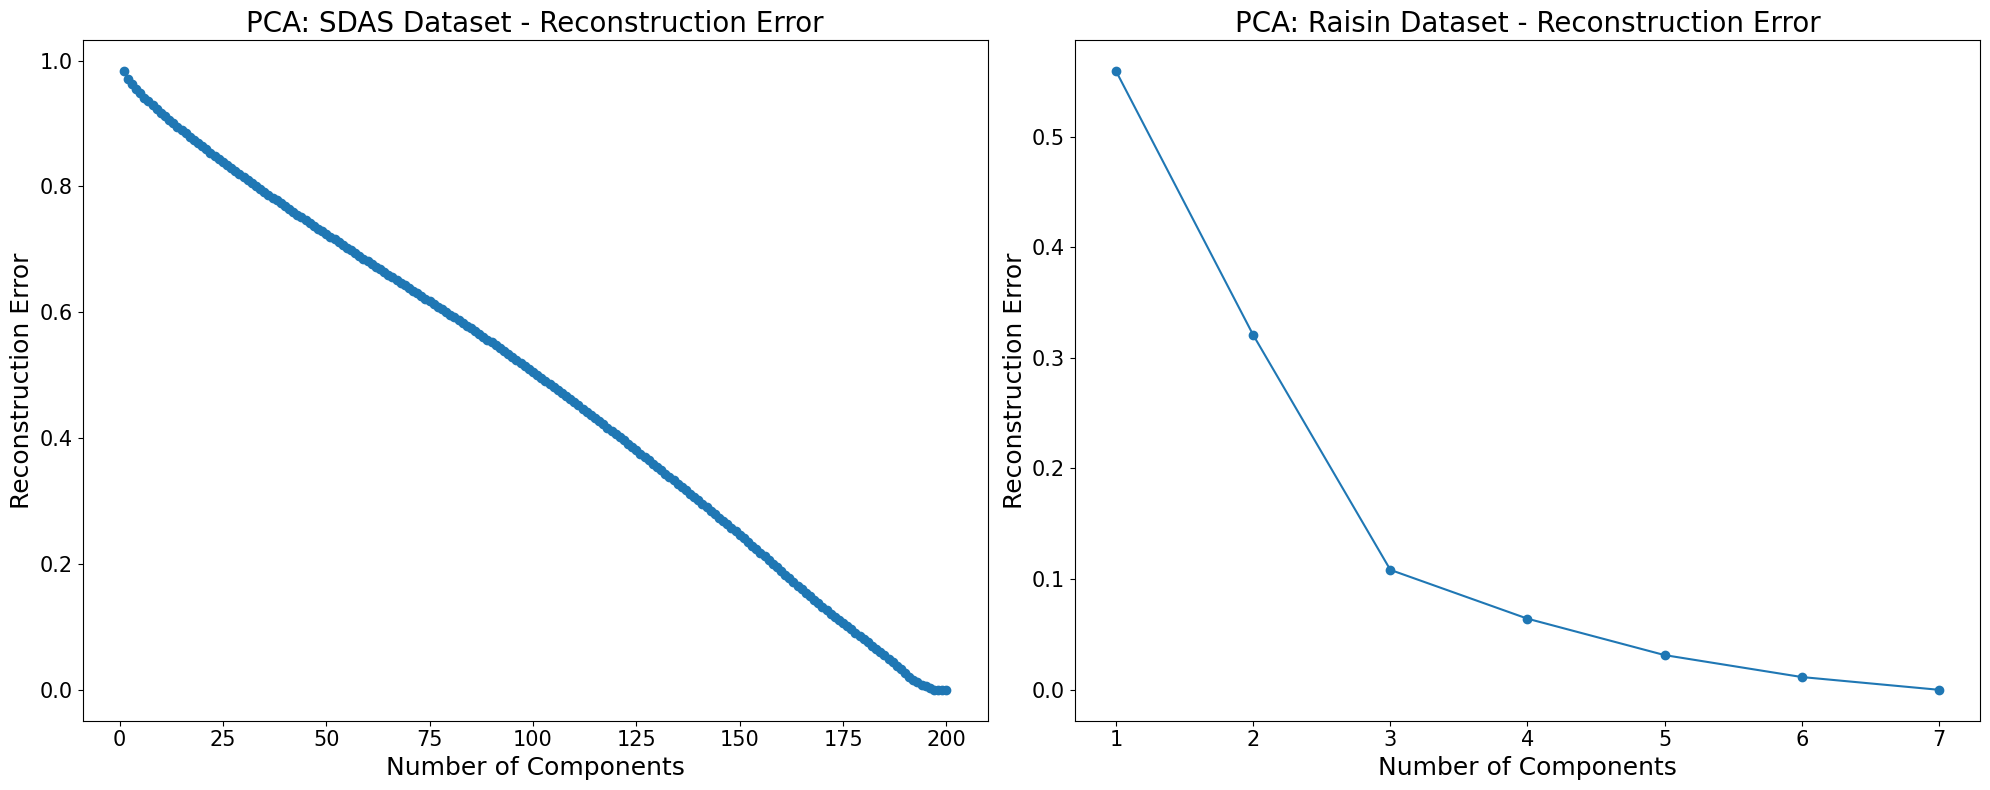

Text(0.5, 1.0, 'PCA: Raisin Dataset - Average Collinearity')

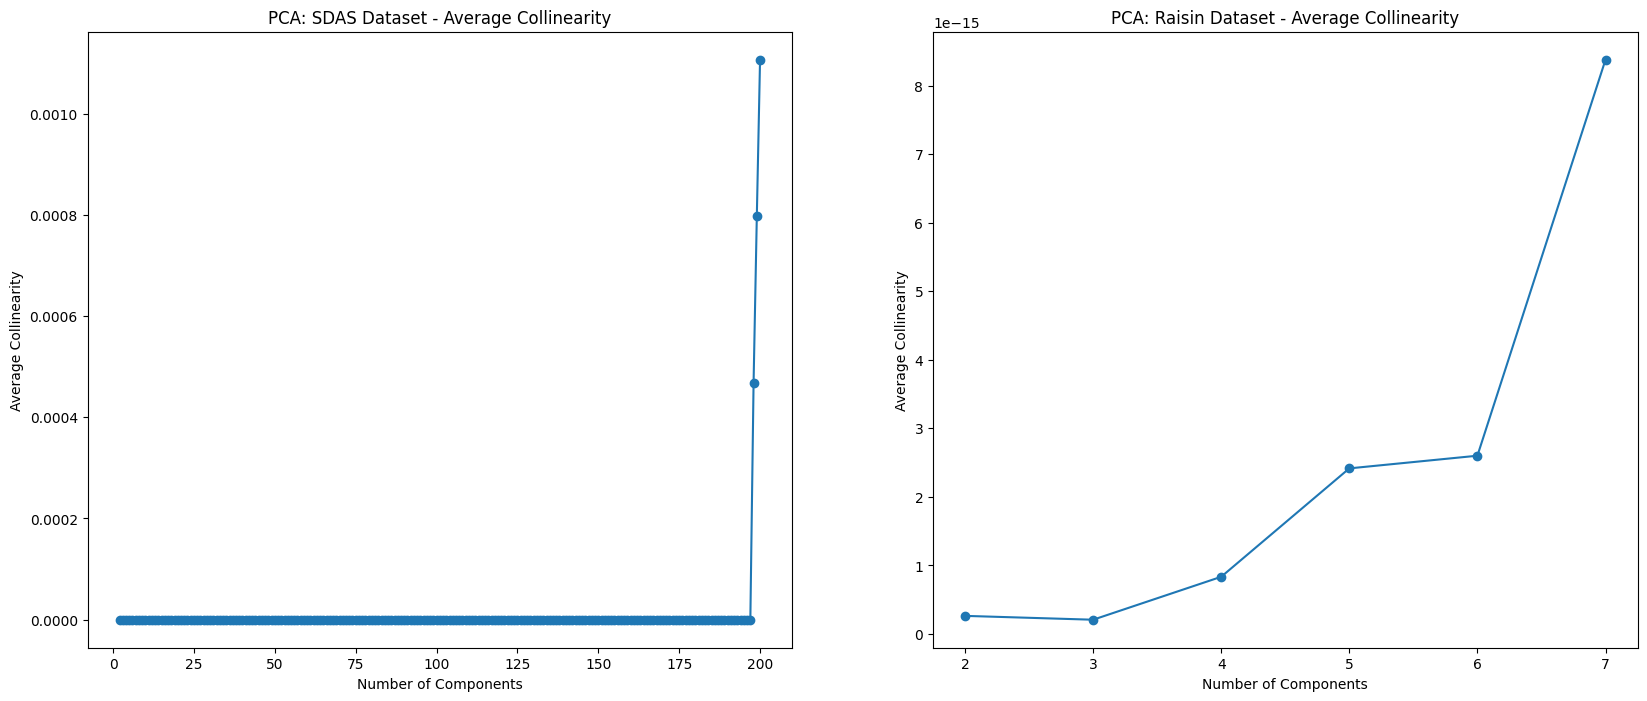

In [505]:
reload_all()
reload_notebook_cell()
# Fit PCA for Raisin dataset
# Fit PCA and calculate reconstruction error for SDAS dataset
errors_sdas, reconstruction_percentages_asds,components_sdas, avg_collinearity_sdas = pipeline_helpers.reconstruction_error(X_train_sdas, pipeline=pipelines.PCANoStandard_pipeline, list_of_categories=CATEGORY_COLUMNS_UCML, gather_correlation=True)

# Fit PCA and calculate reconstruction error for Raisin dataset
errors_raisin, reconstruction_percentages_raisin,components_raisin, avg_collinearity_raisin = pipeline_helpers.reconstruction_error(X_train_raisin, pipeline=pipelines.PCANoStandard_pipeline, list_of_categories=[],   gather_correlation=True)

# Plot the reconstruction error for both datasets
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# SDAS dataset
axs[0].plot(components_sdas, reconstruction_percentages_asds, marker='o')
axs[0].set_xlabel('Number of Components')
axs[0].set_ylabel('Reconstruction Error')
axs[0].set_title('PCA: SDAS Dataset - Reconstruction Error')

# Raisin dataset
axs[1].plot(components_raisin, reconstruction_percentages_raisin, marker='o')
axs[1].set_xlabel('Number of Components')
axs[1].set_ylabel('Reconstruction Error')
axs[1].set_title('PCA: Raisin Dataset - Reconstruction Error')

helpers.increase_font_size_subplots_included(plt)

plt.tight_layout()
plt.show()

# plot the collinearity for both datasets
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# SDAS dataset
axs[0].plot(components_sdas[1:], avg_collinearity_sdas[1:], marker='o')
axs[0].set_xlabel('Number of Components')
axs[0].set_ylabel('Average Collinearity')
axs[0].set_title('PCA: SDAS Dataset - Average Collinearity')

# Raisin dataset
axs[1].plot(components_raisin[1:], avg_collinearity_raisin[1:], marker='o')
axs[1].set_xlabel('Number of Components')
axs[1].set_ylabel('Average Collinearity')
axs[1].set_title('PCA: Raisin Dataset - Average Collinearity')



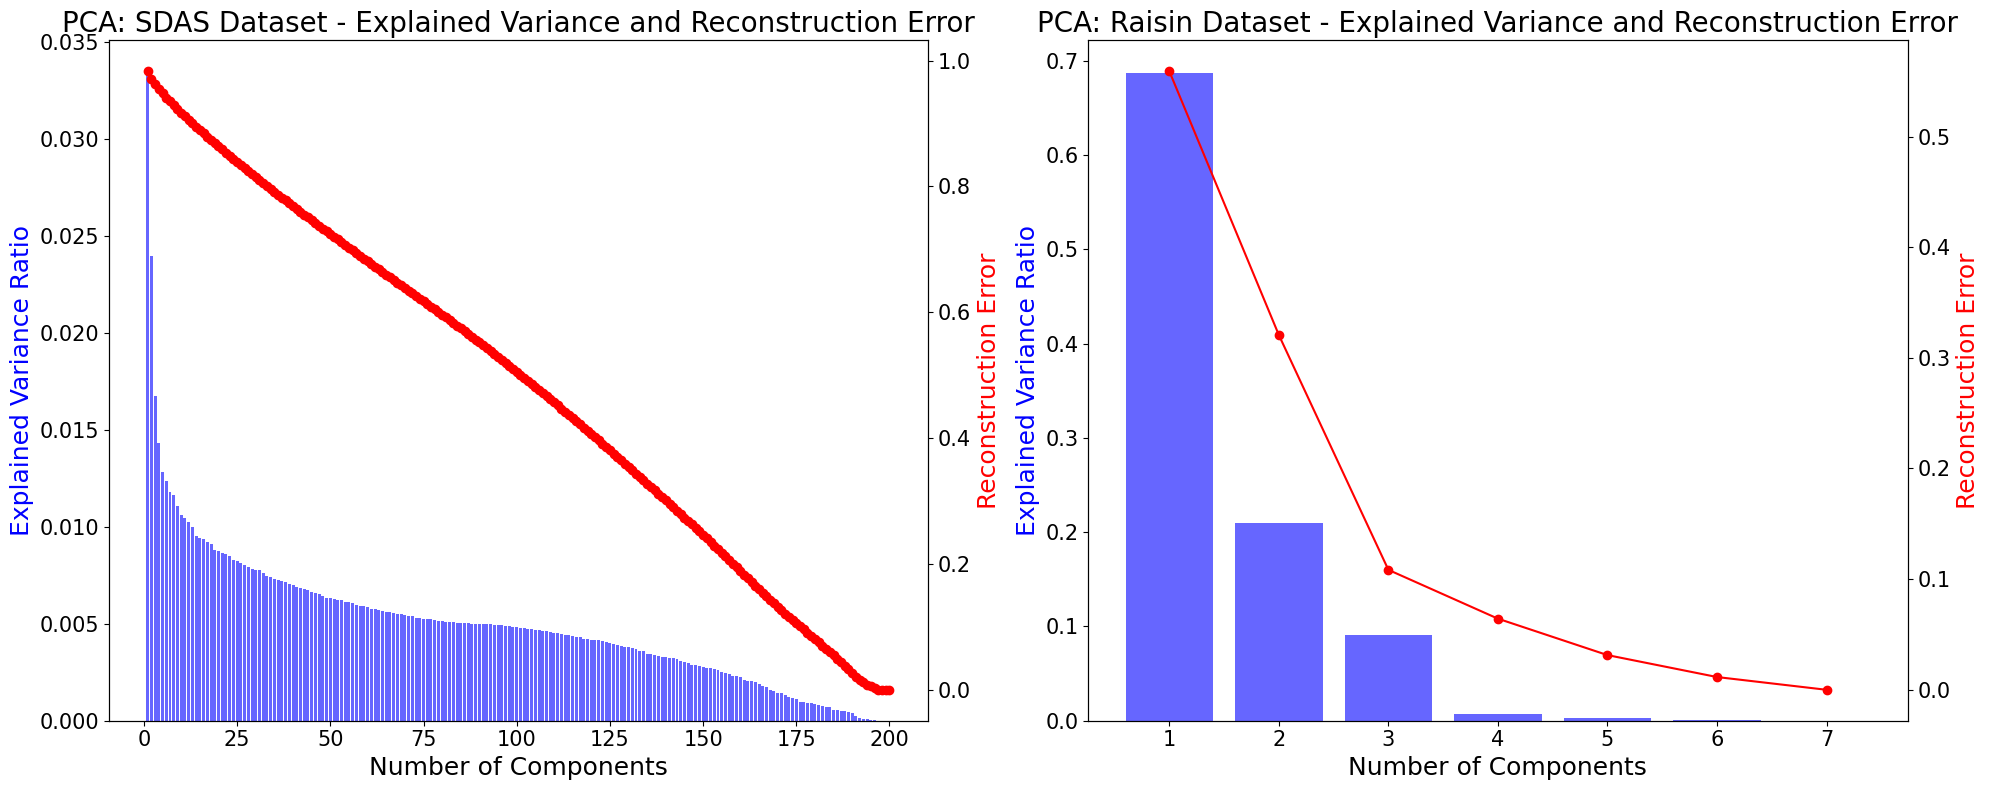

Best number of components for SDAS dataset: 154
Best number of components for Raisin dataset: 3


In [540]:
# Plot explained variance and reconstruction error for both datasets
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# SDAS dataset
ax1 = axs[0]
ax2 = ax1.twinx()
ax1.bar(range(1, len(explained_variance_sdas) + 1), explained_variance_sdas, color='b', alpha=0.6)
ax2.plot(components_sdas, reconstruction_percentages_asds, marker='o', color='r')

ax1.set_xlabel('Number of Components')
ax1.set_ylabel('Explained Variance Ratio', color='b')
ax2.set_ylabel('Reconstruction Error', color='r')
ax1.set_title('PCA: SDAS Dataset - Explained Variance and Reconstruction Error')

# Raisin dataset
ax1 = axs[1]
ax2 = ax1.twinx()
ax1.bar(range(1, len(explained_variance_raisin) + 1), explained_variance_raisin, color='b', alpha=0.6)
ax2.plot(components_raisin, reconstruction_percentages_raisin, marker='o', color='r')

ax1.set_xlabel('Number of Components')
ax1.set_ylabel('Explained Variance Ratio', color='b')
ax2.set_ylabel('Reconstruction Error', color='r')
ax1.set_title('PCA: Raisin Dataset - Explained Variance and Reconstruction Error')

helpers.increase_font_size_subplots_included(plt)

plt.tight_layout()
plt.show()

# Determine the best number of components for each dataset
cumulative_variance_sdas = np.cumsum(explained_variance_sdas)
cumulative_variance_raisin = np.cumsum(explained_variance_raisin)

best_n_components_sdas = np.argmax(cumulative_variance_sdas >= 0.95) + 1
best_n_components_raisin = np.argmax(cumulative_variance_raisin >= 0.9) + 1

print(f"Best number of components for SDAS dataset: {best_n_components_sdas}")
print(f"Best number of components for Raisin dataset: {best_n_components_raisin}")

In [541]:
import pandas as pd
reload_notebook_cell()

# Fit PCA for SDAS dataset

# Fit PCA for SDAS dataset
pca_sdas = pipelines.PCA_pipeline(X_train_sdas, list_of_categories=CATEGORY_COLUMNS_UCML, n_components=2, random_state=42)
pca_sdas.fit(X_train_sdas)
loadings_sdas = pca_sdas['classifier'].components_.T
features_sdas = X_train_sdas.columns

# Fit PCA for Raisin dataset
pca_raisin = pipelines.PCA_pipeline(X_train_raisin, list_of_categories=[], n_components=2, random_state=42)
pca_raisin.fit(X_train_raisin)
loadings_raisin = pca_raisin['classifier'].components_.T
features_raisin = X_train_raisin.columns

# Create DataFrame for loading scores
loadings_df_sdas = pd.DataFrame(loadings_sdas, index=features_sdas, columns=['PC1', 'PC2'])
loadings_df_raisin = pd.DataFrame(loadings_raisin, index=features_raisin, columns=['PC1', 'PC2'])

# Get top 2 influential features for each principal component
top_features_sdas_pc1 = loadings_df_sdas['PC1'].abs().sort_values(ascending=False).head(2).index.tolist()
top_features_sdas_pc2 = loadings_df_sdas['PC2'].abs().sort_values(ascending=False).head(2).index.tolist()

top_features_raisin_pc1 = loadings_df_raisin['PC1'].abs().sort_values(ascending=False).head(2).index.tolist()
top_features_raisin_pc2 = loadings_df_raisin['PC2'].abs().sort_values(ascending=False).head(2).index.tolist()

# Print the top 2 influential features
print("SDAS Dataset - Top 2 Influential Features for PC1:", top_features_sdas_pc1)
print("SDAS Dataset - Top 2 Influential Features for PC2:", top_features_sdas_pc2)

print("\nRaisin Dataset - Top 2 Influential Features for PC1:", top_features_raisin_pc1)
print("Raisin Dataset - Top 2 Influential Features for PC2:", top_features_raisin_pc2)


SDAS Dataset - Top 2 Influential Features for PC1: ["encoding__Father's occupation_132", "encoding__Mother's qualification_29"]
SDAS Dataset - Top 2 Influential Features for PC2: ["encoding__Father's occupation_163", 'encoding__Application mode_2']

Raisin Dataset - Top 2 Influential Features for PC1: ['Eccentricity', 'Extent']
Raisin Dataset - Top 2 Influential Features for PC2: ['ConvexArea', 'MinorAxisLength']


## TSNE Cluster Evals for SDAS AND PCA datasets

Best parameters for SDAS: 5.0
Best parameters for Raisin: 50.0


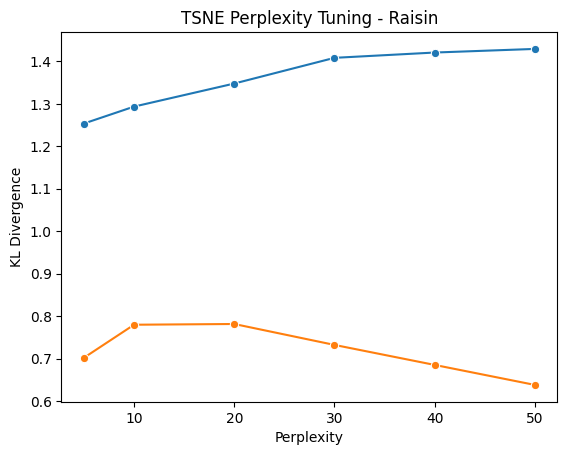

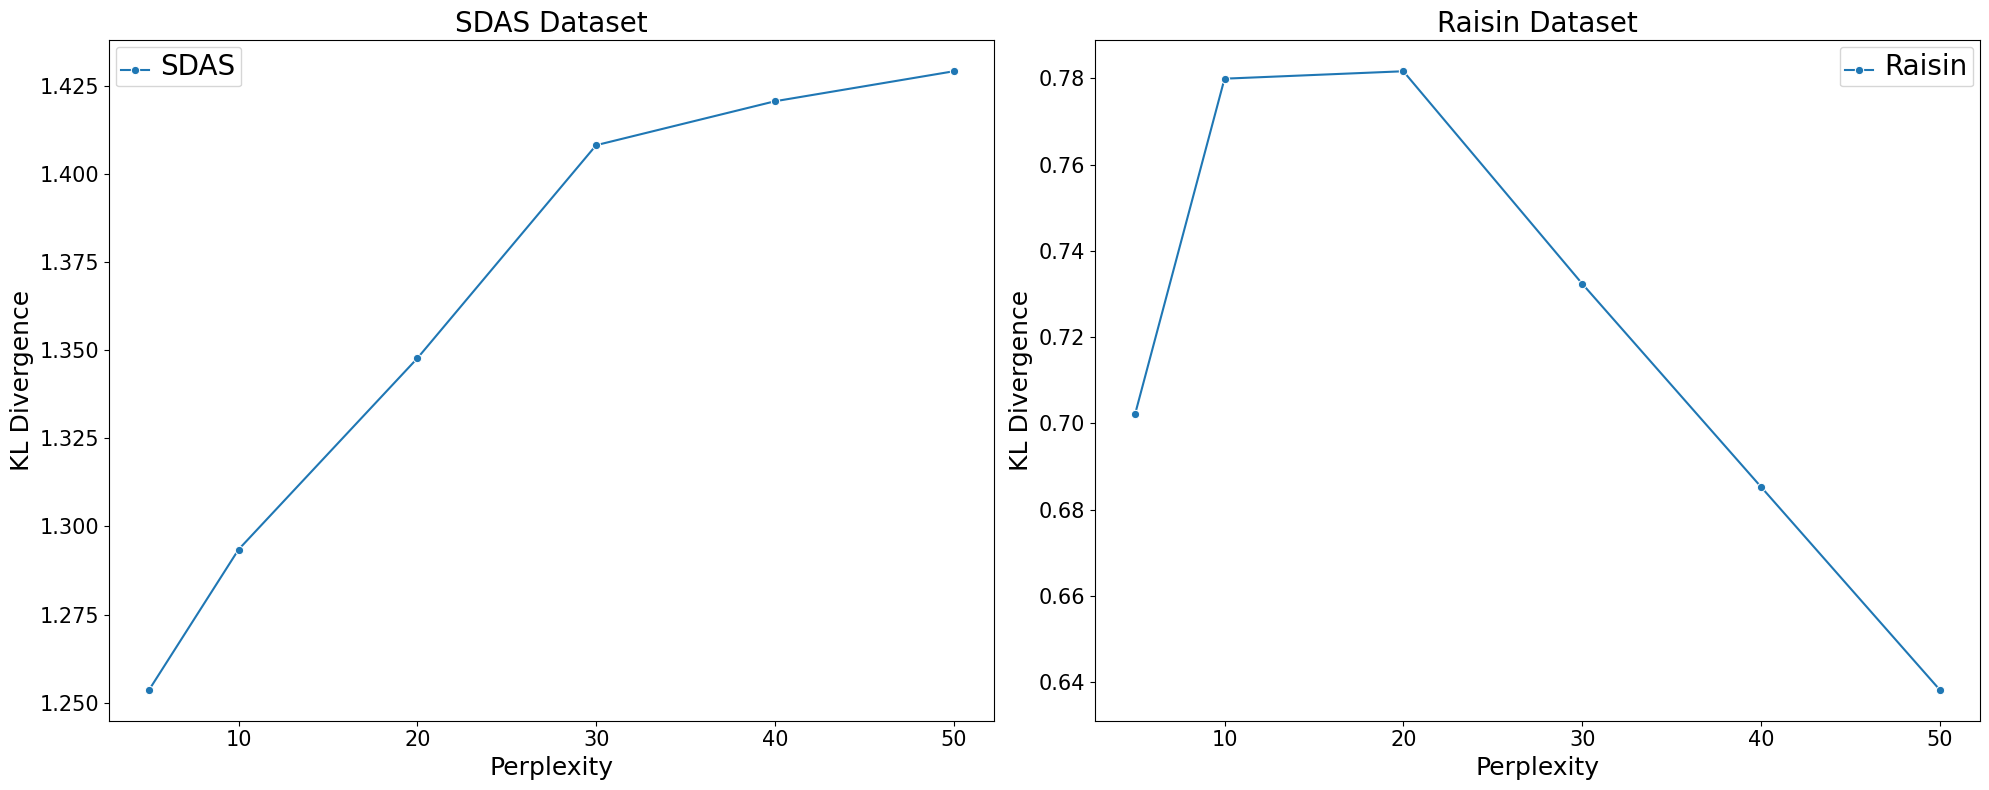

In [542]:
reload_notebook_cell()




# Fit PCA for SDAS dataset
pca_sdas_comp = pipelines.PCA_pipeline(X_train_sdas, list_of_categories=CATEGORY_COLUMNS_UCML, n_components=best_n_components_sdas, random_state=42).fit_transform(X_train_sdas)
pca_raisin_comp = pipelines.PCA_pipeline(X_train_raisin, list_of_categories=[], n_components=best_n_components_raisin, random_state=42).fit_transform(X_train_raisin)

# Fit PCA for SDAS dataset

# source https://www.datacamp.com/tutorial/introduction-t-sne get the minimum kl divergence for the perplexity
# Perform GridSearchCV for both datasets
best_params_sdas, results_sdas, best_tsne_model_sdas = pipeline_helpers.grid_search_tsne(pca_sdas_comp, [], "SDAS",sns)
best_params_raisin, results_raisin, best_tsne_model_raisin = pipeline_helpers.grid_search_tsne(pca_raisin_comp, [], "Raisin", sns)

# Print the best parameters
print(f"Best parameters for SDAS: {best_params_sdas}")
print(f"Best parameters for Raisin: {best_params_raisin}")

# Plot results
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

sns.lineplot(data=results_sdas, x='Perplexity', y='KL Divergence', label='SDAS' , marker='o', ax=axs[0]).set_title('SDAS Dataset')
sns.lineplot(data=results_raisin, x='Perplexity', y='KL Divergence', label='Raisin',  marker='o', ax=axs[1]).set_title('Raisin Dataset')

helpers.increase_font_size_subplots_included(plt)

plt.tight_layout()
plt.show()

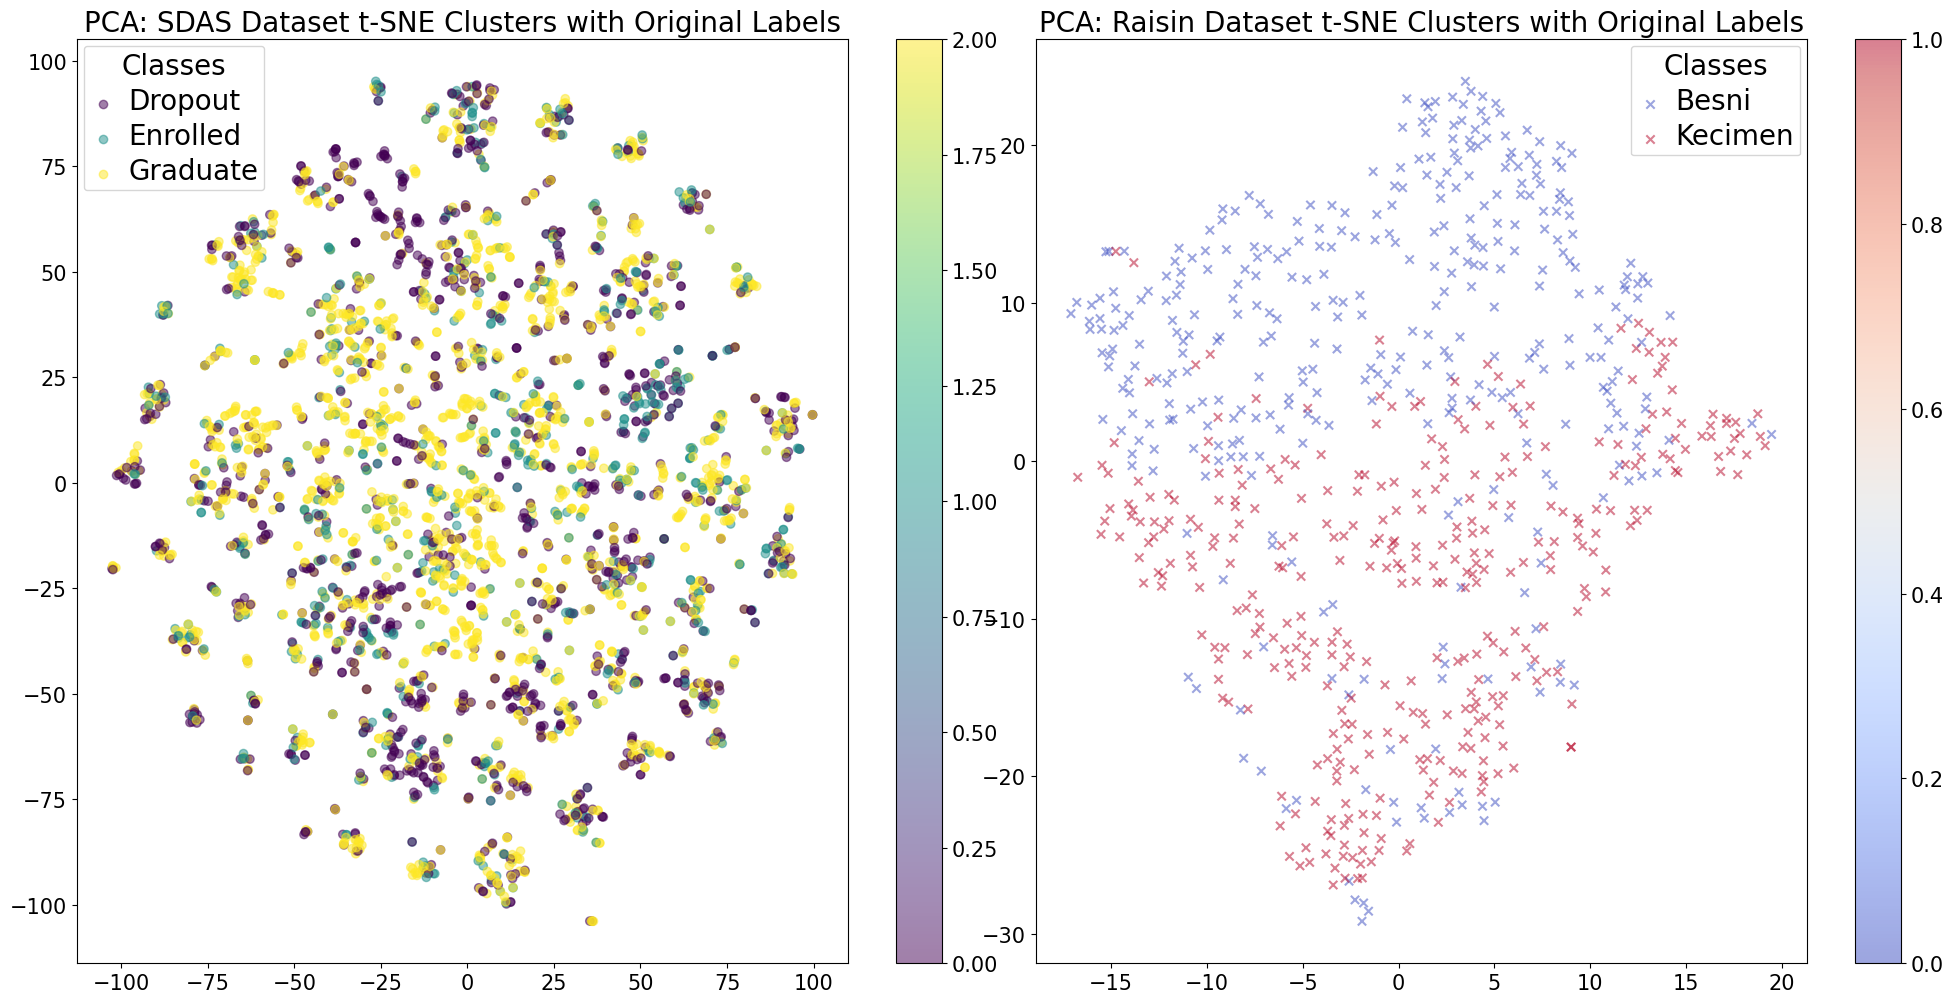

In [543]:
# Visualize clusters vs original labels using t-SNE

kwargs_sdas_tsne = {'n_components': 2, 'random_state': 42, 'perplexity': 5}
kwargs_raisin_tsne = {'n_components': 2, 'random_state': 42, 'perplexity': 50}
tsne_sdas = TSNE_pipeline(pca_sdas_comp, list_of_categories=CATEGORY_COLUMNS_UCML, **kwargs_sdas_tsne)
tsne_raisin = TSNE_pipeline(pca_raisin_comp, **kwargs_raisin_tsne)
    
tsne_comps_raisin = tsne_raisin.fit_transform(pca_raisin_comp)
tsne_comps_asds = tsne_sdas.fit_transform(pca_sdas_comp)
    
# Create subplots for visualization
plt.figure(figsize=(20, 10))

# SDAS Dataset
plt.subplot(1, 2, 1)
plt.title("PCA: SDAS Dataset t-SNE Clusters with Original Labels")
scatter_sdas = plt.scatter(tsne_comps_asds[:, 0], tsne_comps_asds[:, 1], c=y_train_encoded_sdas, cmap='viridis', marker='o', alpha=0.5)
plt.colorbar()
# Create a legend for SDAS dataset
handles_sdas, _ = scatter_sdas.legend_elements()
labels_sdas = [str(i) for i in np.unique(y_train_sdas)]
plt.legend(handles_sdas, labels_sdas, title="Classes")
plt.tight_layout()

# Raisin Dataset
plt.subplot(1, 2, 2)
plt.title("PCA: Raisin Dataset t-SNE Clusters with Original Labels")
scatter_raisin = plt.scatter(tsne_comps_raisin[:, 0], tsne_comps_raisin[:, 1], c=y_train_encode_raisin, cmap='coolwarm', marker='x', alpha=0.5)
plt.colorbar()
# Create a legend for Raisin dataset
handles_raisin, _ = scatter_raisin.legend_elements()
labels_raisin = [str(i) for i in np.unique(y_train_raisin)]
plt.legend(handles_raisin, labels_raisin, title="Classes")

plt.tight_layout()
helpers.increase_font_size_subplots_included(plt)
plt.show()

## Random Projection Analysis


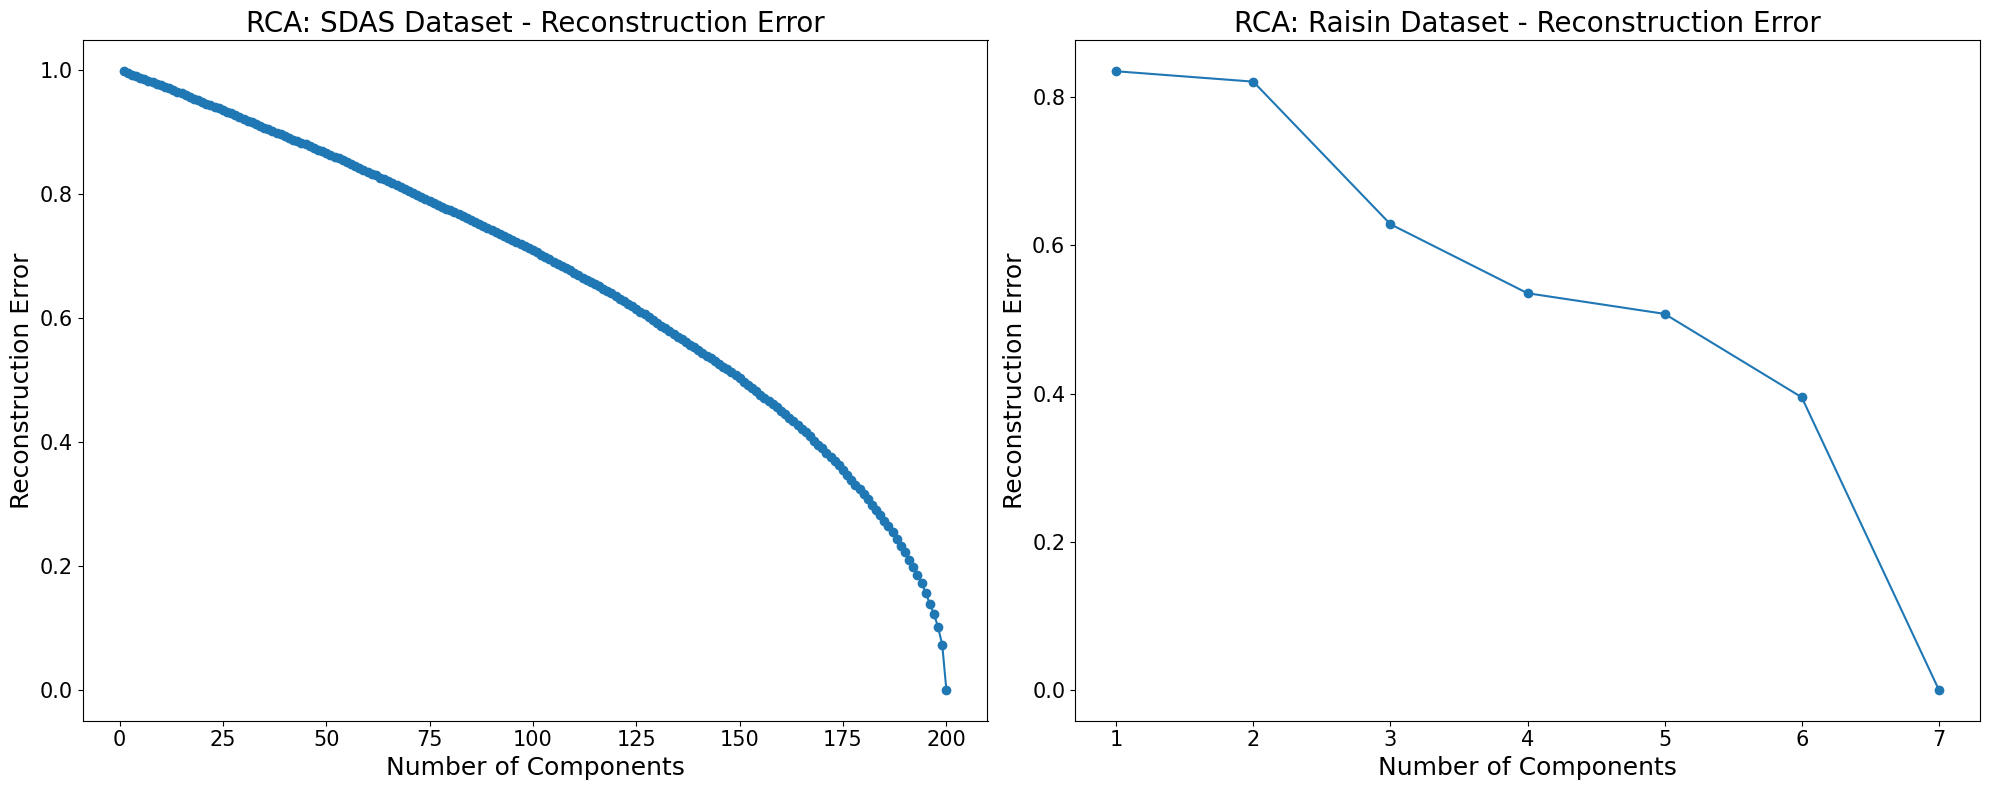

Best component for SDAS dataset (bottom 5th percentile of errors): 186 0.2538750090806517
Best component for Raisin dataset (bottom 90th percentile of errors): 5 0.3949936339902973


[0.20940701697281008,
 0.19773449352813996,
 0.18595083956157182,
 0.1722099507765543,
 0.15630671906379676,
 0.1386678380748285,
 0.12208828947131825,
 0.10092827356270054,
 0.07263347760681044,
 2.3149060779514853e-14]

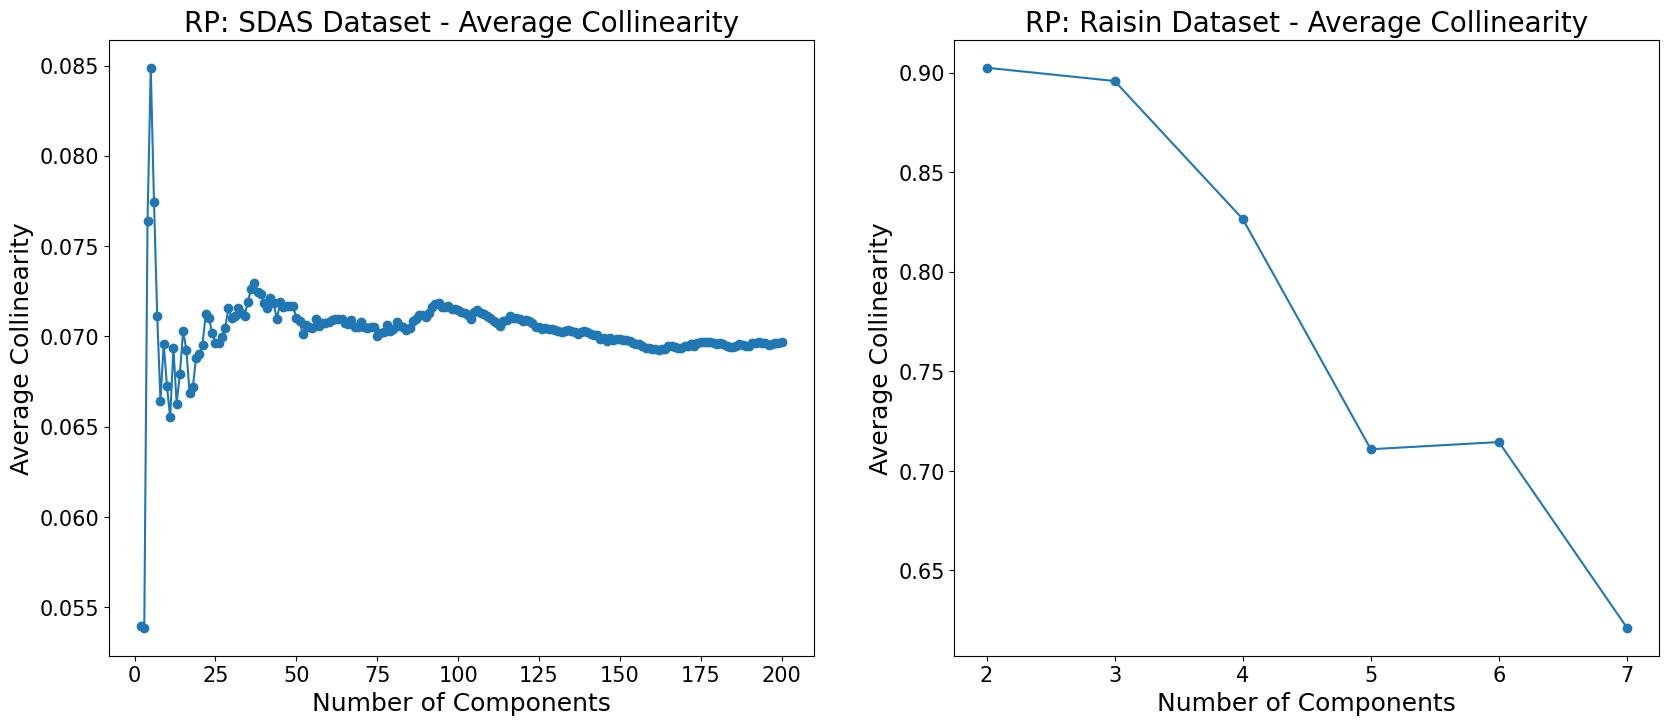

In [561]:
reload_all()
reload_notebook_cell()
# Fit PCA for Raisin dataset
# Fit PCA and calculate reconstruction error for SDAS dataset
errors_sdas, reconstruction_percentages_asds,components_sdas, avg_collinearity_sdas = pipeline_helpers.reconstruction_error(X_train_sdas, pipeline=pipelines.GaussianRPNoStandard_pipeline, list_of_categories=CATEGORY_COLUMNS_UCML, gather_correlation=True)

# # Fit PCA and calculate reconstruction error for Raisin dataset
errors_raisin, reconstruction_percentages_raisin,components_raisin, avg_collinearity_raisin = pipeline_helpers.reconstruction_error(X_train_raisin, pipeline=pipelines.GaussianRPNoStandard_pipeline, list_of_categories=[], gather_correlation=True) 

# # Plot the reconstruction error for both datasets
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# SDAS dataset
axs[0].plot(components_sdas, reconstruction_percentages_asds, marker='o')
axs[0].set_xlabel('Number of Components')
axs[0].set_ylabel('Reconstruction Error')
axs[0].set_title('RCA: SDAS Dataset - Reconstruction Error')

# Raisin dataset
axs[1].plot(components_raisin, reconstruction_percentages_raisin, marker='o')
axs[1].set_xlabel('Number of Components')
axs[1].set_ylabel('Reconstruction Error')
axs[1].set_title('RCA: Raisin Dataset - Reconstruction Error')

helpers.increase_font_size_subplots_included(plt)

plt.tight_layout()
plt.show()

# find where the reconstruction matrix keeps 95% of its error





# plot the collinearity for both datasets
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# SDAS dataset
axs[0].plot(components_sdas[1:], avg_collinearity_sdas[1:], marker='o')
axs[0].set_xlabel('Number of Components')
axs[0].set_ylabel('Average Collinearity')
axs[0].set_title('RP: SDAS Dataset - Average Collinearity')

# Raisin dataset
axs[1].plot(components_raisin[1:], avg_collinearity_raisin[1:], marker='o')
axs[1].set_xlabel('Number of Components')
axs[1].set_ylabel('Average Collinearity')
axs[1].set_title('RP: Raisin Dataset - Average Collinearity')

helpers.increase_font_size_subplots_included(plt)

# print the percntile for reconstruction error of the 170th component
best_component_sdas = np.max(np.argwhere(np.array(reconstruction_percentages_asds) > 0.25) )
best_component_raisin = np.max(np.argwhere(np.array(reconstruction_percentages_raisin) > 0.25) )
print(f"Best component for SDAS dataset (bottom 5th percentile of errors): {best_component_sdas} {reconstruction_percentages_asds[best_component_sdas]}")
print(f"Best component for Raisin dataset (bottom 90th percentile of errors): {best_component_raisin} {reconstruction_percentages_raisin[best_component_raisin]}")
 
reconstruction_percentages_asds[-10:]


## Evaluate Best RP ALgos


Best parameters for SDAS: 5.0
Best parameters for Raisin: 50.0


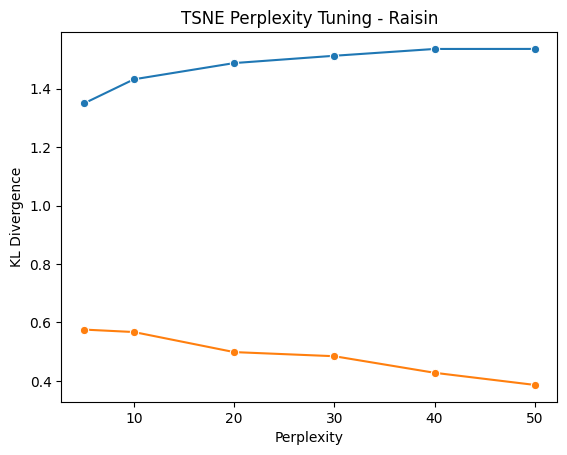

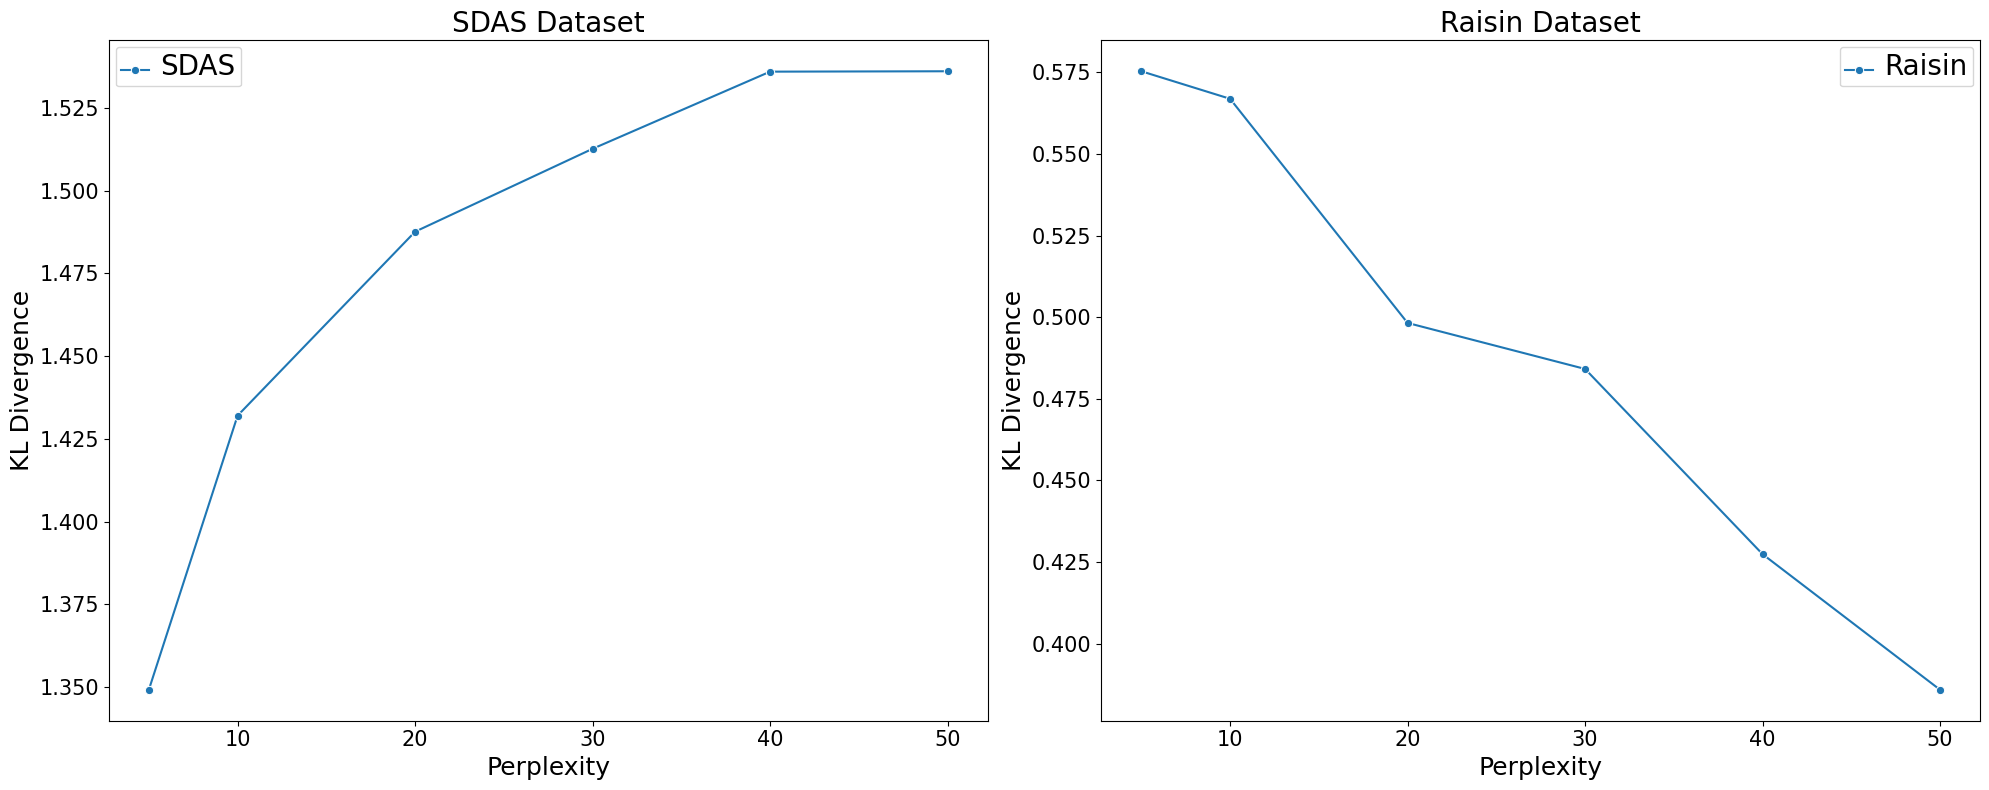

In [545]:
reload_notebook_cell()




# Fit PCA for SDAS dataset
pca_sdas_comp = pipelines.GaussianRP_pipeline(X_train_sdas, list_of_categories=CATEGORY_COLUMNS_UCML, n_components=best_component_sdas, random_state=42).fit_transform(X_train_sdas)
pca_raisin_comp = pipelines.GaussianRP_pipeline(X_train_raisin, list_of_categories=[], n_components=best_component_raisin, random_state=42).fit_transform(X_train_raisin)

# Fit PCA for SDAS dataset

# source https://www.datacamp.com/tutorial/introduction-t-sne get the minimum kl divergence for the perplexity
# Perform GridSearchCV for both datasets
best_params_sdas, results_sdas, best_tsne_model_sdas = pipeline_helpers.grid_search_tsne(pca_sdas_comp, CATEGORY_COLUMNS_UCML, "SDAS",sns)
best_params_raisin, results_raisin, best_tsne_model_raisin = pipeline_helpers.grid_search_tsne(pca_raisin_comp, [], "Raisin", sns)

# Print the best parameters
print(f"Best parameters for SDAS: {best_params_sdas}")
print(f"Best parameters for Raisin: {best_params_raisin}")

# Plot results
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

sns.lineplot(data=results_sdas, x='Perplexity', y='KL Divergence', label='SDAS' , marker='o', ax=axs[0]).set_title('SDAS Dataset')
sns.lineplot(data=results_raisin, x='Perplexity', y='KL Divergence', label='Raisin',  marker='o', ax=axs[1]).set_title('Raisin Dataset')

helpers.increase_font_size_subplots_included(plt)

plt.tight_layout()
plt.show()

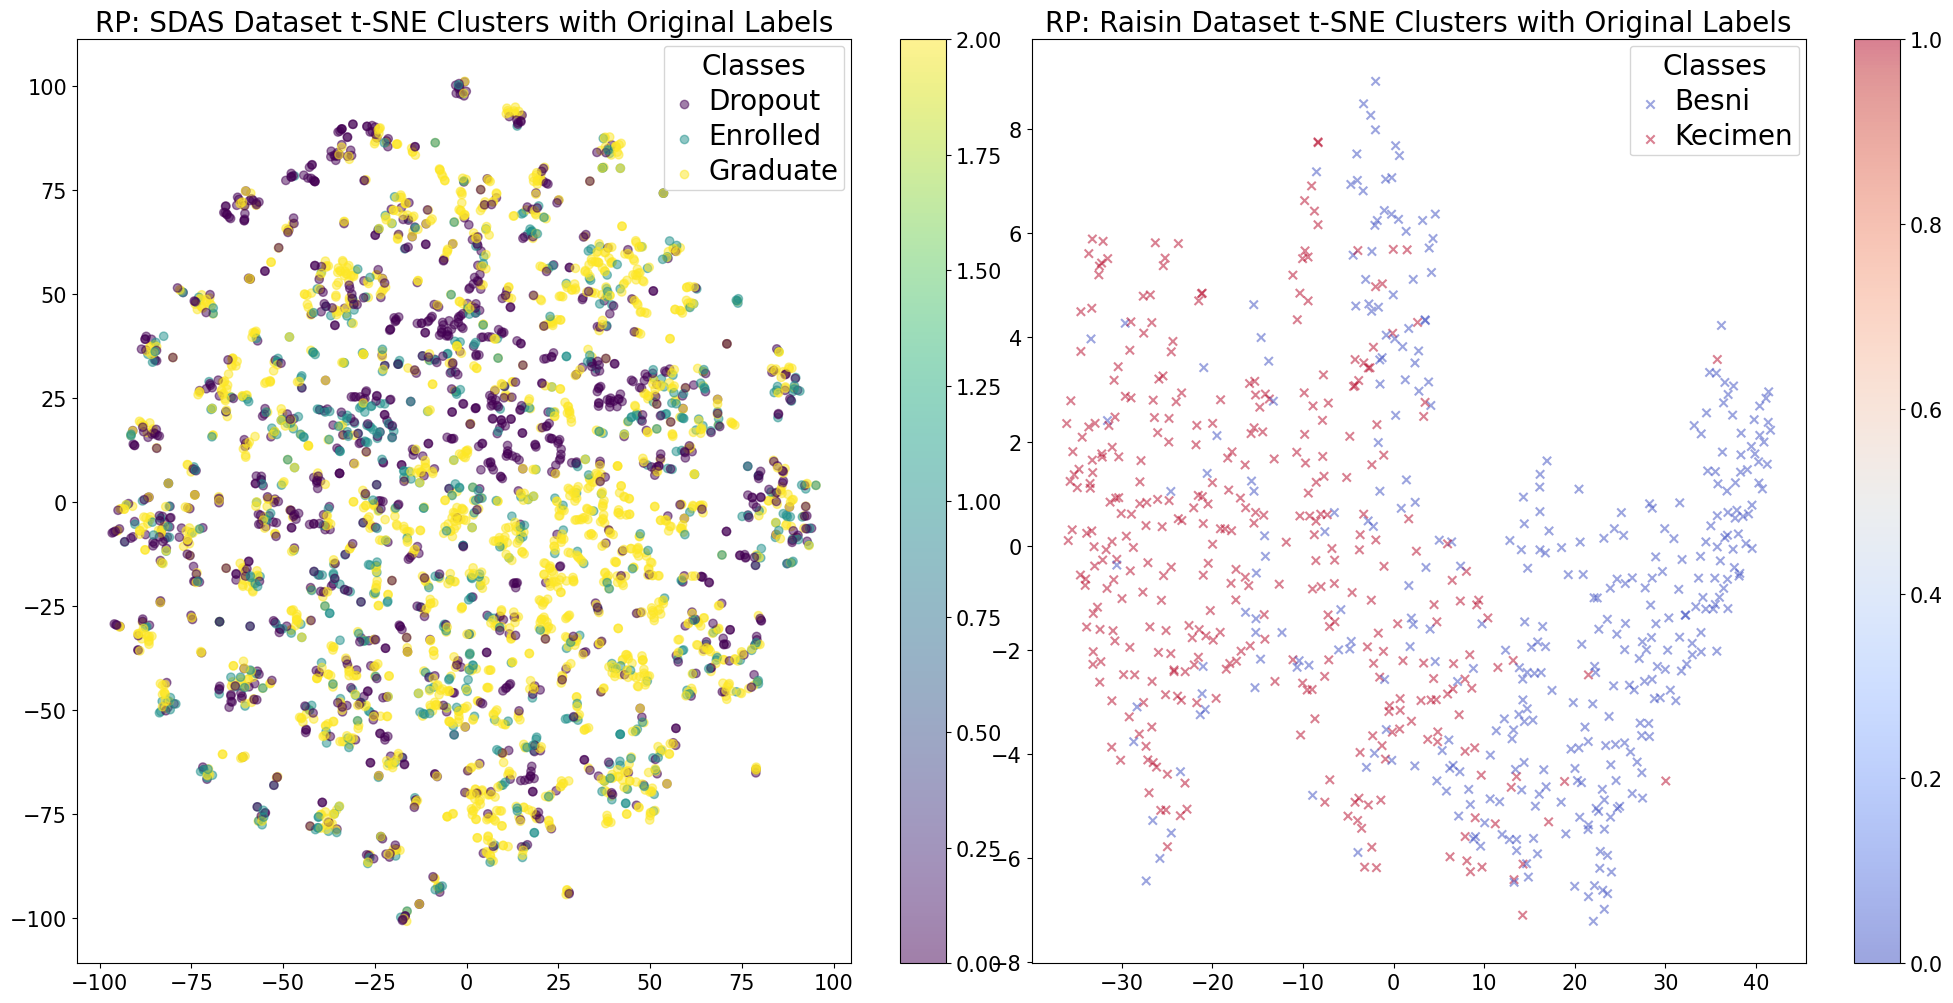

In [546]:
reload_notebook_cell()


kwargs_sdas_tsne = {'n_components': 2, 'random_state': 42, 'perplexity': 5}
kwargs_raisin_tsne = {'n_components': 2, 'random_state': 42, 'perplexity': 50}
tsne_sdas = TSNE_pipeline(pca_sdas_comp, list_of_categories=CATEGORY_COLUMNS_UCML, **kwargs_sdas_tsne)
tsne_raisin = TSNE_pipeline(pca_raisin_comp, **kwargs_raisin_tsne)
    
tsne_comps_raisin = tsne_raisin.fit_transform(pca_raisin_comp)
tsne_comps_asds = tsne_sdas.fit_transform(pca_sdas_comp)
    
# Create subplots for visualization
plt.figure(figsize=(20, 10))

# SDAS Dataset
plt.subplot(1, 2, 1)
plt.title("RP: SDAS Dataset t-SNE Clusters with Original Labels")
scatter_sdas = plt.scatter(tsne_comps_asds[:, 0], tsne_comps_asds[:, 1], c=y_train_encoded_sdas, cmap='viridis', marker='o', alpha=0.5)
plt.colorbar()
# Create a legend for SDAS dataset
handles_sdas, _ = scatter_sdas.legend_elements()
labels_sdas = [str(i) for i in np.unique(y_train_sdas)]
plt.legend(handles_sdas, labels_sdas, title="Classes")
plt.tight_layout()

# Raisin Dataset
plt.subplot(1, 2, 2)
plt.title("RP: Raisin Dataset t-SNE Clusters with Original Labels")
scatter_raisin = plt.scatter(tsne_comps_raisin[:, 0], tsne_comps_raisin[:, 1], c=y_train_encode_raisin, cmap='coolwarm', marker='x', alpha=0.5)
plt.colorbar()
# Create a legend for Raisin dataset
handles_raisin, _ = scatter_raisin.legend_elements()
labels_raisin = [str(i) for i in np.unique(y_train_raisin)]
plt.legend(handles_raisin, labels_raisin, title="Classes")

plt.tight_layout()
helpers.increase_font_size_subplots_included(plt)
plt.show()

## ICA Analysis

c:\Users\WarrenKushner\miniconda3\envs\MLA2\lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
c:\Users\WarrenKushner\miniconda3\envs\MLA2\lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
c:\Users\WarrenKushner\miniconda3\envs\MLA2\lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
c:\Users\WarrenKushner\miniconda3\envs\MLA2\lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
c:\Users\WarrenKushner\miniconda3\envs\MLA2\lib\site-packages\sklearn\decomp

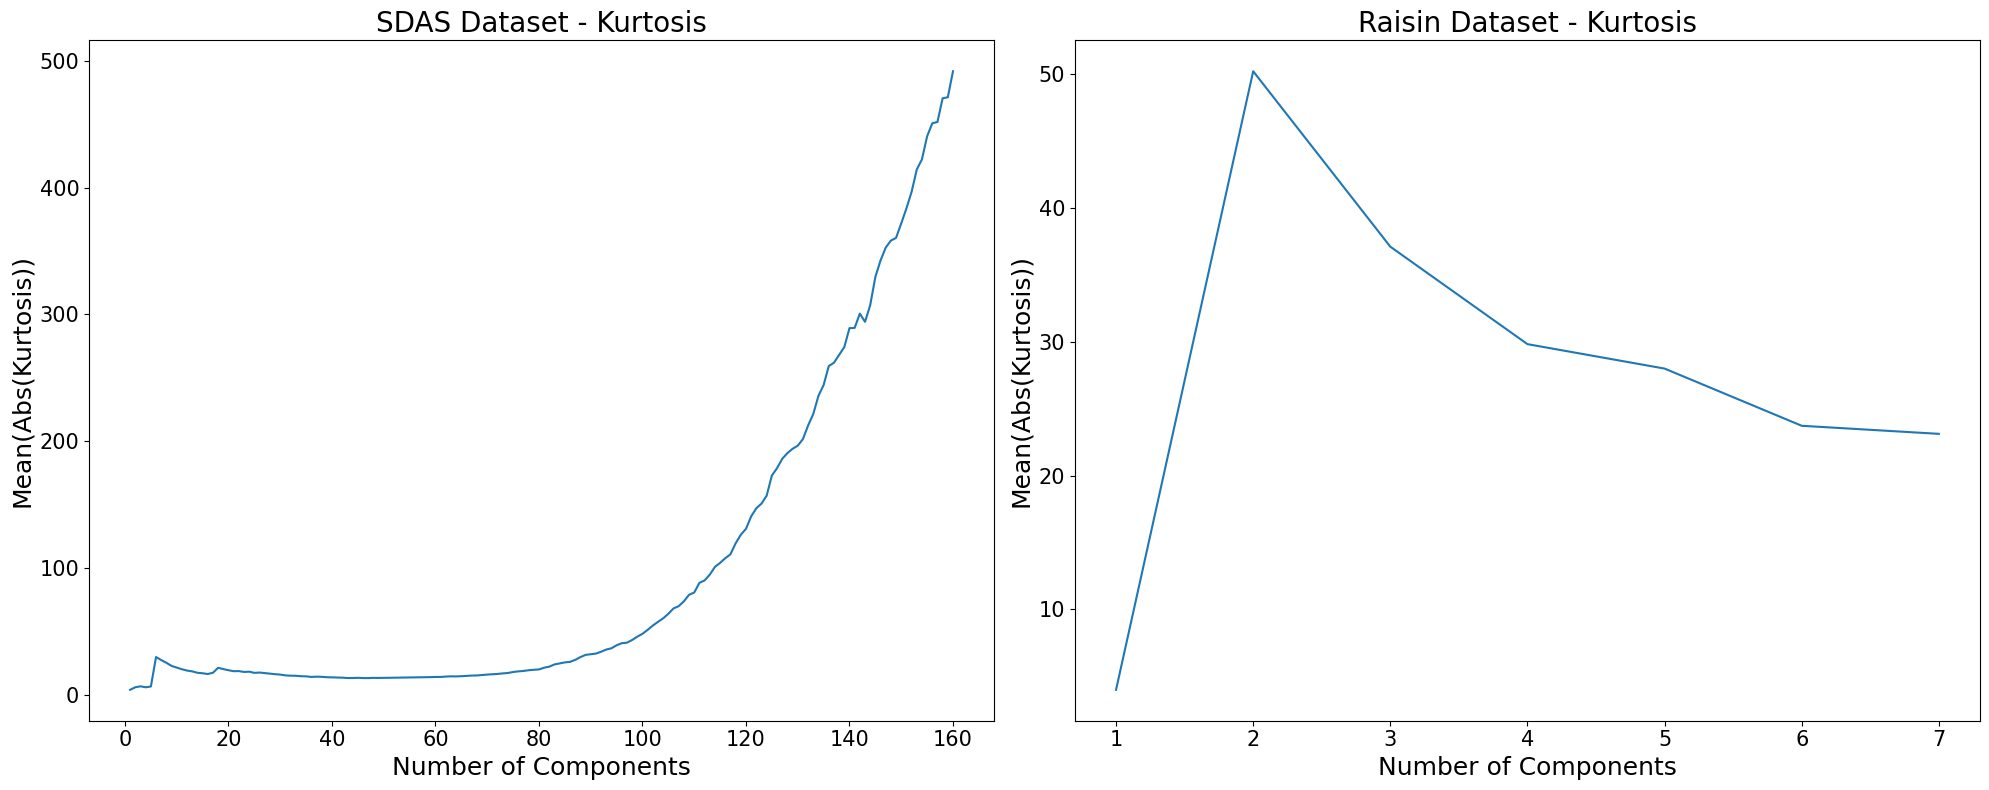

Best number of components for SDAS dataset: 1
Best number of components for Raisin dataset: 1


In [563]:
# Fit ICA for SDAS dataset
reload_notebook_cell()
# kwargs = {'random_state': 42, 'max_iter': 400,  'tol': 0.0001, 'whiten':'unit-variance'}
# ica_sdas = pipelines.ICA_pipeline(X_train_sdas, list_of_categories=CATEGORY_COLUMNS_UCML, **kwargs) #increased max_iter and tolerance for convergence
# ica_sdas.fit(X_train_sdas)
# kurtosis_sdas = kurtosis(ica_sdas["classifier"].components_, axis=0, fisher=False)

abs_mean_kurtosis_raisin = []
for i in range(1,7+1):
    # # Fit ICA for Raisin dataset
    ica_raisin = pipelines.ICA_pipeline(X_train_raisin, list_of_categories=[], n_components=i, whiten= 'unit-variance', random_state=42)
    X_train_raisn_transformed = ica_raisin.fit_transform(X_train_raisin)
    kurtosis_raisin = kurtosis(X_train_raisn_transformed, axis=0, fisher=False)
    abs_mean_kurtosis = np.mean(np.abs(kurtosis_raisin))
    abs_mean_kurtosis_raisin.append(abs_mean_kurtosis)
    # print(f"Kurtosis for {X_train_raisn_transformed.shape} {kurtosis_raisin.shape}Raisin dataset with {i} components: {np.mean(np.abs(kurtosis_raisin))}")
    # print(f"Kurtosis for Raisin dataset with {i} components: {np.mean(np.abs(kurtosis_raisin))}")

abs_mean_kurtosis_sdas = []
for i in range(1, 160+1):
    # Fit ICA for SDAS dataset
    ica_sdas = pipelines.ICA_pipeline(X_train_sdas, list_of_categories=CATEGORY_COLUMNS_UCML,  n_components=i, whiten= 'unit-variance', random_state=42)
    X_train_sdas_transformed = ica_sdas.fit_transform(X_train_sdas)
    kurtosis_sdas = kurtosis(X_train_sdas_transformed, axis=0, fisher=False)
    abs_mean_kurtosis = np.mean(np.abs(kurtosis_sdas))
    abs_mean_kurtosis_sdas.append(abs_mean_kurtosis)
    # print(f"Kurtosis for {X_train_sdas_transformed.shape} {kurtosis_sdas.shape} SDAS dataset with {i} components: {np.mean(np.abs(kurtosis_sdas))}")
    # print(f"Kurtosis for SDAS dataset with {i} components: {np.mean(np.abs(kurtosis_sdas))}")
    
    

# # Plot kurtosis for both datasets
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# SDAS dataset
axs[0].plot(range(1, len(abs_mean_kurtosis_sdas) + 1), abs_mean_kurtosis_sdas)
axs[0].set_xlabel('Number of Components')
axs[0].set_ylabel('Mean(Abs(Kurtosis))')
axs[0].set_title('SDAS Dataset - Kurtosis')

# Raisin dataset
axs[1].plot(range(1, len(abs_mean_kurtosis_raisin) + 1), abs_mean_kurtosis_raisin)
axs[1].set_xlabel('Number of Components')
axs[1].set_ylabel('Mean(Abs(Kurtosis))')
axs[1].set_title('Raisin Dataset - Kurtosis')

helpers.increase_font_size_subplots_included(plt)

plt.tight_layout()
plt.show()

# Determine the best number of components for each dataset based on a kurtosis threshold
threshold_sdas = 2  # Example threshold, adjust based on your needs
threshold_raisin = 2  # Example threshold, adjust based on your needs

best_n_components_sdas = np.argmax(kurtosis_sdas >= threshold_sdas) + 1
best_n_components_raisin = np.argmax(kurtosis_raisin >= threshold_raisin) + 1

print(f"Best number of components for SDAS dataset: {best_n_components_sdas}")
print(f"Best number of components for Raisin dataset: {best_n_components_raisin}")

In [508]:
reload_notebook_cell()
X_train_raisin_zscaled = pipelines.preprocess_pipeline(X_train_raisin, []).fit_transform(X_train_raisin)
kurtosis_raisin_raw = kurtosis(X_train_raisin_zscaled, axis=0, fisher=False)
abs_mean_kurtosis_raw = np.mean(np.abs(kurtosis_raisin_raw))

X_train_sdas_zscaled = pipelines.preprocess_pipeline(X_train_sdas, CATEGORY_COLUMNS_UCML).fit_transform(X_train_sdas)
kurtosis_sdas_raw = kurtosis(X_train_sdas_zscaled, axis=0, fisher=False)
abs_mean_kurtosis_raw_sdas = np.mean(np.abs(kurtosis_sdas_raw[~np.isnan(kurtosis_sdas_raw)]))

# one hot encoded features omitted from the pipeline
X_train_sdas_zscaled_no_encode = pipelines.preprocess_pipeline(X_train_sdas[[c for c in X_train_sdas.columns if 'encoding' not in c]],[]).fit_transform(X_train_sdas[[c for c in X_train_sdas.columns if 'encoding' not in c]])
kurtosis_sdas_raw_no_encode = kurtosis(X_train_sdas_zscaled_no_encode, axis=0, fisher=False)
abs_mean_kurtosis_raw_sdas_no_encode = np.mean(np.abs(kurtosis_sdas_raw_no_encode[~np.isnan(kurtosis_sdas_raw_no_encode)]))

print(f"Mean(Abs(Kurtosis)) for Raisin dataset: {abs_mean_kurtosis_raw}")
print(f"Mean(Abs(Kurtosis)) for SDAS dataset with one hot encoding: {abs_mean_kurtosis_raw_sdas}")
print(f"Mean(Abs(Kurtosis)) for SDAS dataset without one hot encoding: {abs_mean_kurtosis_raw_sdas_no_encode}")




Mean(Abs(Kurtosis)) for Raisin dataset: 4.55785374435983
Mean(Abs(Kurtosis)) for SDAS dataset with one hot encoding: 1037.7533849945721
Mean(Abs(Kurtosis)) for SDAS dataset without one hot encoding: 21.156413108473096


c:\Users\WarrenKushner\miniconda3\envs\MLA2\lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
c:\Users\WarrenKushner\miniconda3\envs\MLA2\lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
c:\Users\WarrenKushner\miniconda3\envs\MLA2\lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
c:\Users\WarrenKushner\miniconda3\envs\MLA2\lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
c:\Users\WarrenKushner\miniconda3\envs\MLA2\lib\site-packages\sklearn\decomp

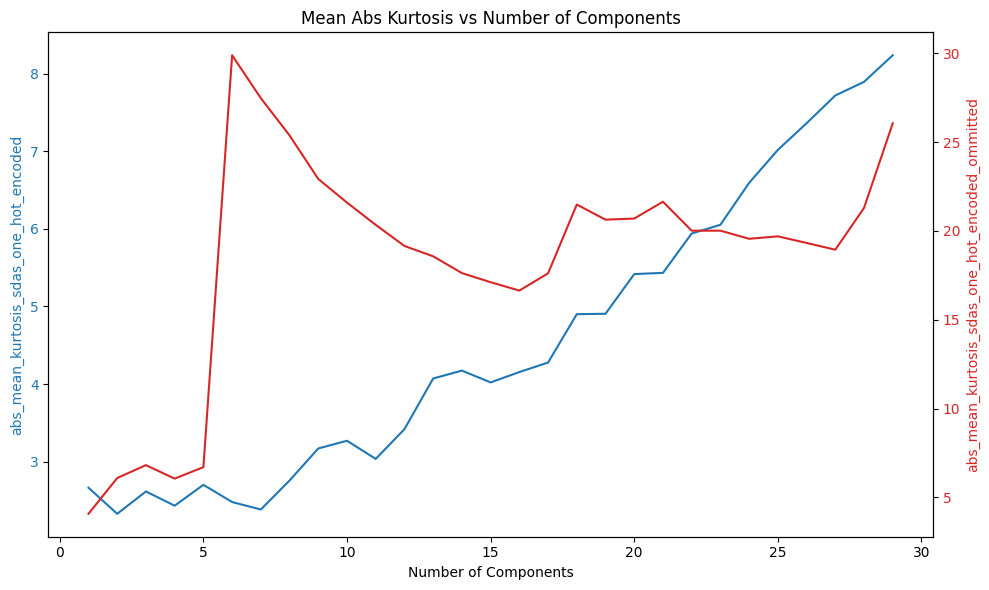

In [509]:
reload_notebook_cell()
# one-hot encoded features omitted from the pipeline
abs_mean_kurtosis_sdas_one_hot_encoded = []
for i in range(1, 29+1):
    # Fit ICA for SDAS dataset
    ica_sdas = pipelines.ICA_pipeline(X_train_sdas[[c for c in X_train_sdas.columns if 'encoding' in c]], list_of_categories=CATEGORY_COLUMNS_UCML, n_components=i, whiten='unit-variance', random_state=42)
    X_train_sdas_transformed = ica_sdas.fit_transform(X_train_sdas[[c for c in X_train_sdas.columns if 'encoding' in c]])
    kurtosis_sdas = kurtosis(X_train_sdas_transformed, axis=0, fisher=False)
    abs_mean_kurtosis = np.mean(np.abs(kurtosis_sdas))
    abs_mean_kurtosis_sdas_one_hot_encoded.append(abs_mean_kurtosis)
    
abs_mean_kurtosis_sdas_one_hot_encoded_ommitted = []
for i in range(1, 29+1):
    # Fit ICA for SDAS dataset
    ica_sdas = pipelines.ICA_pipeline(X_train_sdas[[c for c in X_train_sdas.columns if 'encoding' not in c]], list_of_categories=CATEGORY_COLUMNS_UCML, n_components=i, whiten='unit-variance', random_state=42)
    X_train_sdas_transformed = ica_sdas.fit_transform(X_train_sdas[[c for c in X_train_sdas.columns if 'encoding' not in c]])
    kurtosis_sdas = kurtosis(X_train_sdas_transformed, axis=0, fisher=False)
    abs_mean_kurtosis = np.mean(np.abs(kurtosis_sdas))
    abs_mean_kurtosis_sdas_one_hot_encoded_ommitted.append(abs_mean_kurtosis)

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first dataset on the primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Number of Components')
ax1.set_ylabel('abs_mean_kurtosis_sdas_one_hot_encoded', color=color)
ax1.plot(range(1, len(abs_mean_kurtosis_sdas_one_hot_encoded) + 1), abs_mean_kurtosis_sdas_one_hot_encoded, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Mean Abs Kurtosis vs Number of Components')

# Create a secondary y-axis sharing the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('abs_mean_kurtosis_sdas_one_hot_encoded_ommitted', color=color)
ax2.plot(range(1, len(abs_mean_kurtosis_sdas_one_hot_encoded_ommitted) + 1), abs_mean_kurtosis_sdas_one_hot_encoded_ommitted, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # Adjust layout to make room for the y-axis labels
plt.show()

In [510]:
# max component for the omitted one hot encoded features

best_n_components_sdas_one_hot_encoded = np.argmax(abs_mean_kurtosis_sdas_one_hot_encoded_ommitted) + 1
print(f"Best number of components for SDAS dataset with one-hot encoded features: {best_n_components_sdas_one_hot_encoded} {np.max(abs_mean_kurtosis_sdas_one_hot_encoded)}")

Best number of components for SDAS dataset with one-hot encoded features: 6 8.236347440551942


Best parameters for SDAS: 50.0
Best parameters for Raisin: 50.0


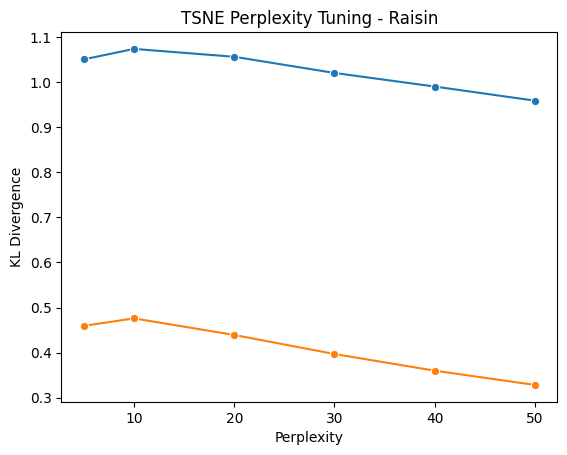

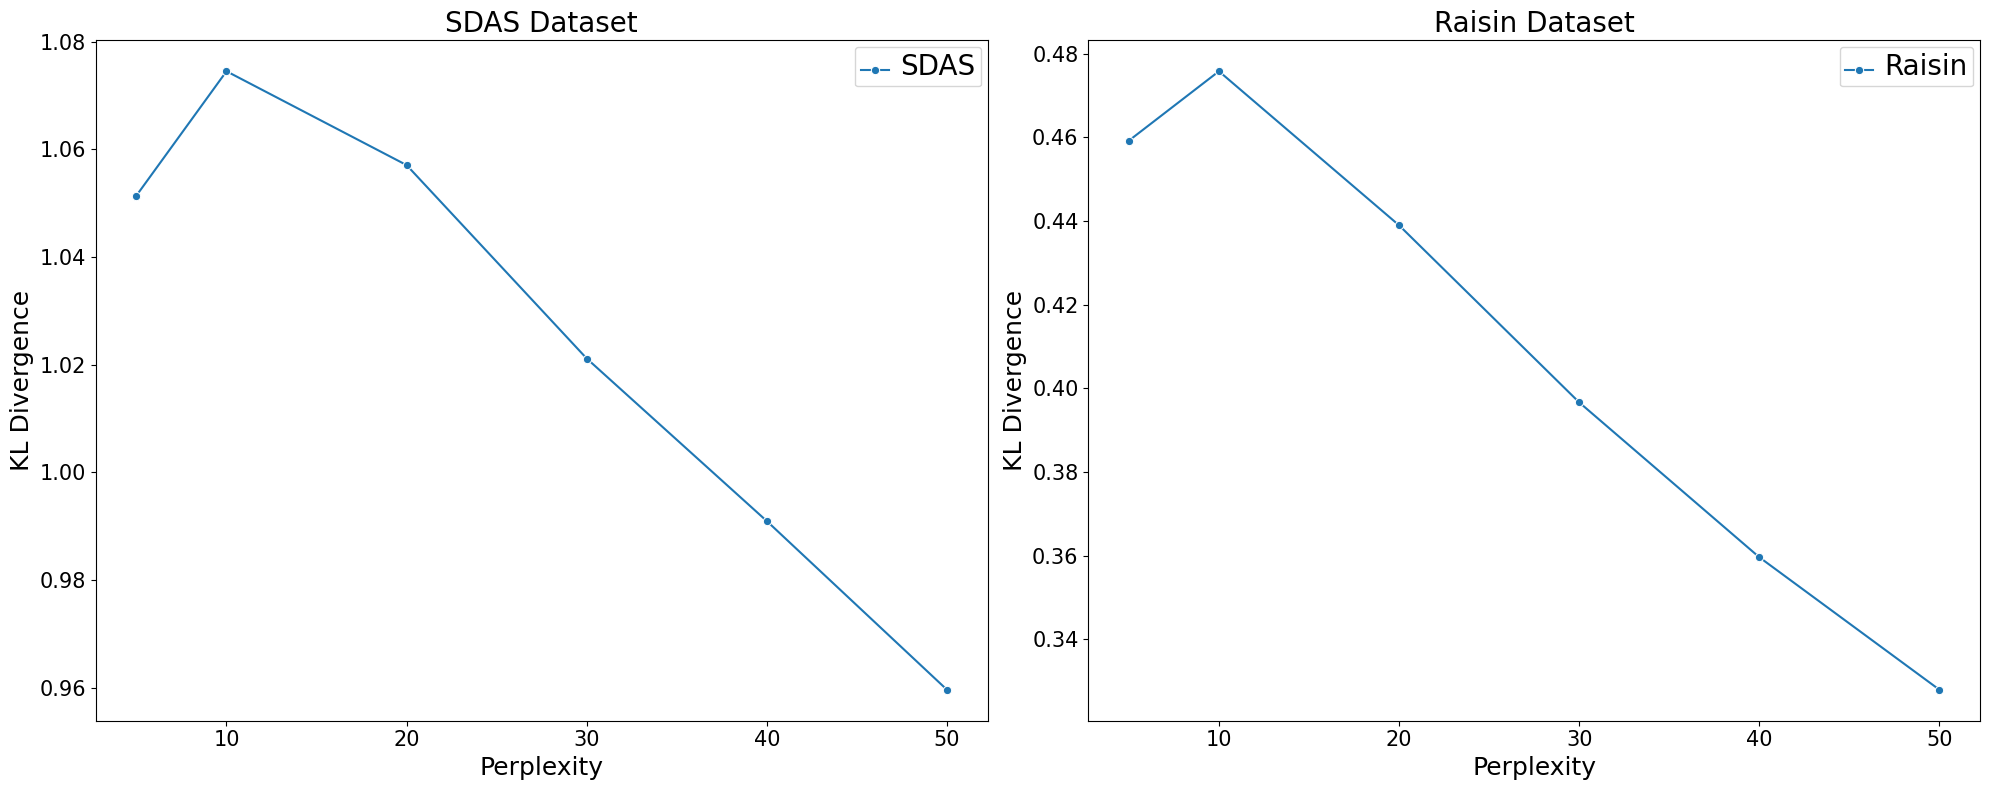

In [530]:
reload_notebook_cell()


# Fit PCA for SDAS dataset
ica_sdas_comp = pipelines.ICA_pipeline(X_train_sdas, list_of_categories=CATEGORY_COLUMNS_UCML, n_components=6, random_state=42, whiten = 'unit-variance').fit_transform(X_train_sdas)
ica_raisin_comp = pipelines.ICA_pipeline(X_train_raisin, list_of_categories=[], n_components=2, random_state=42, whiten = 'unit-variance').fit_transform(X_train_raisin)
# Fit PCA for SDAS dataset

# source https://www.datacamp.com/tutorial/introduction-t-sne get the minimum kl divergence for the perplexity
# Perform GridSearchCV for both datasets
best_params_sdas, results_sdas, best_tsne_model_sdas = pipeline_helpers.grid_search_tsne(ica_sdas_comp, CATEGORY_COLUMNS_UCML, "SDAS",sns)
best_params_raisin, results_raisin, best_tsne_model_raisin = pipeline_helpers.grid_search_tsne(ica_raisin_comp, [], "Raisin", sns)

# Print the best parameters
print(f"Best parameters for SDAS: {best_params_sdas}")
print(f"Best parameters for Raisin: {best_params_raisin}")

# Plot results
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

sns.lineplot(data=results_sdas, x='Perplexity', y='KL Divergence', label='SDAS' , marker='o', ax=axs[0]).set_title('SDAS Dataset')
sns.lineplot(data=results_raisin, x='Perplexity', y='KL Divergence', label='Raisin',  marker='o', ax=axs[1]).set_title('Raisin Dataset')

helpers.increase_font_size_subplots_included(plt)

plt.tight_layout()
plt.show()

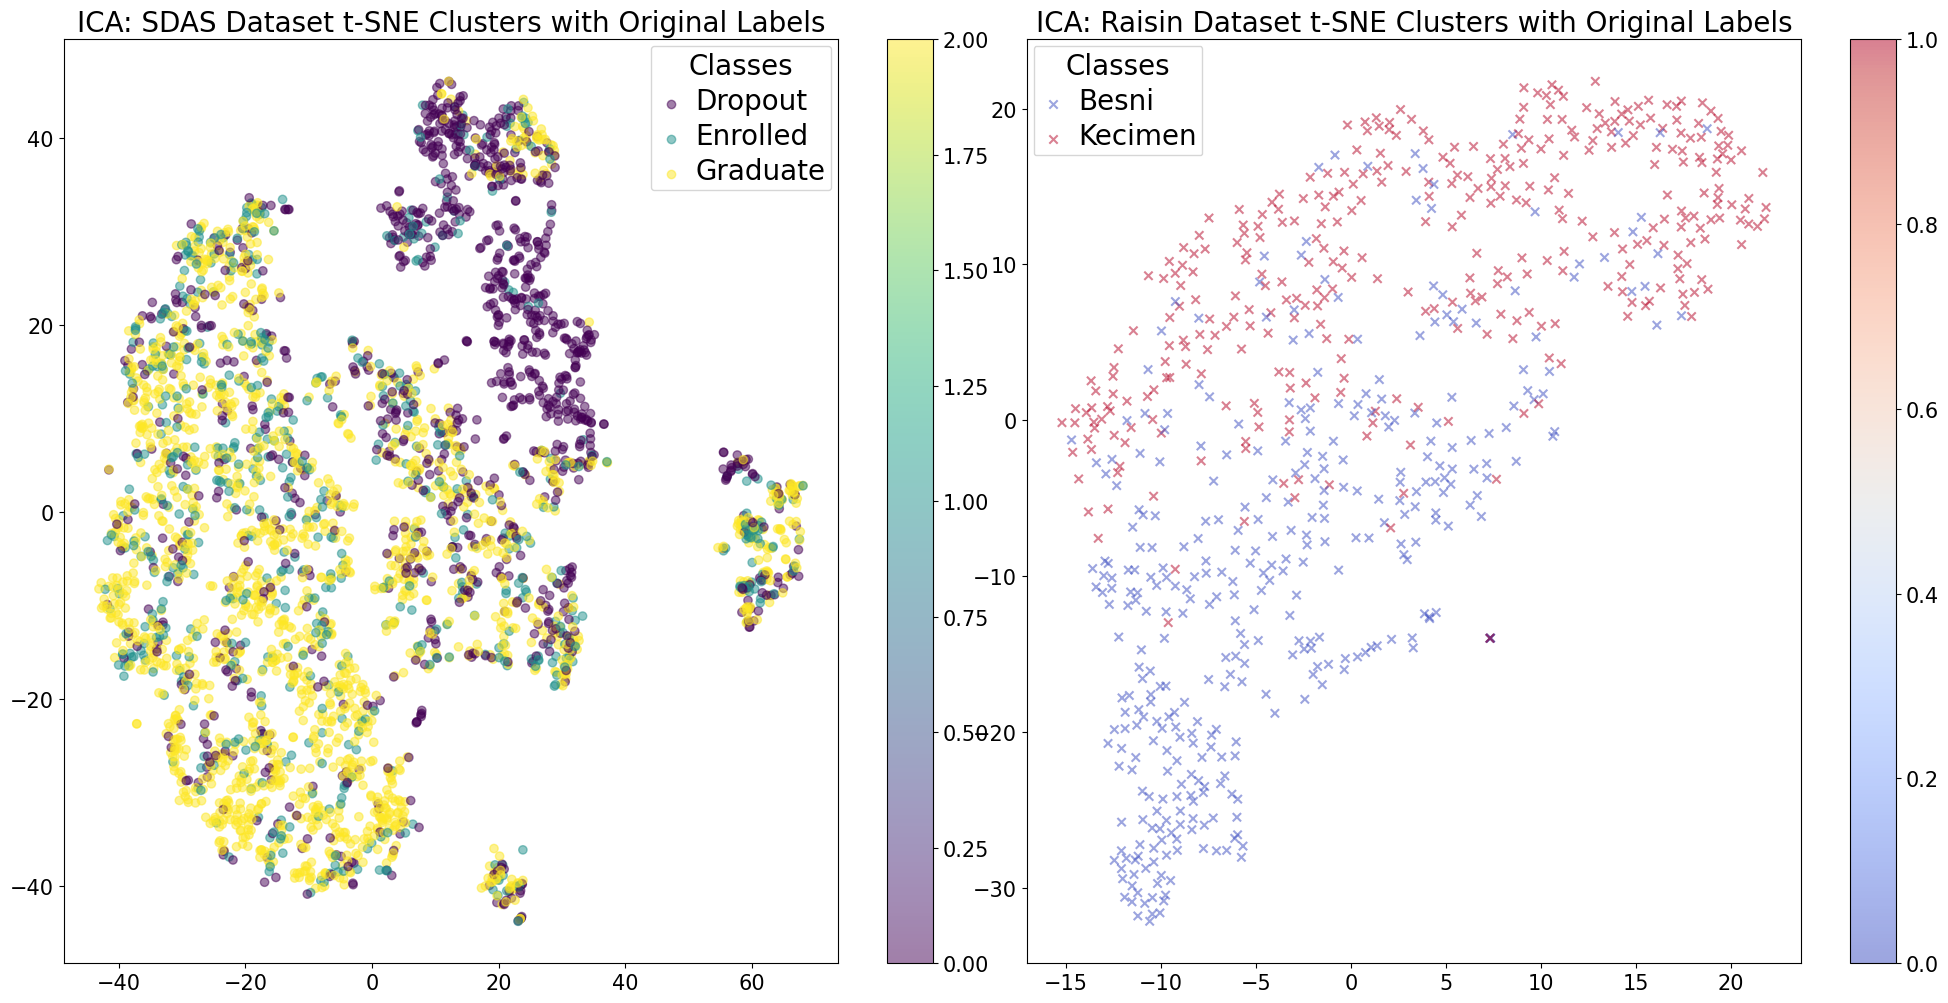

In [531]:
reload_notebook_cell()
# Visualize clusters vs original labels using t-SNE
if 'best_tsne_model_sdas' in locals().keys() and 'best_tsne_model_raisin' in locals().keys():
    tsne_raisin = best_tsne_model_raisin
    tsne_sdas = best_tsne_model_sdas
else:
    kwargs_sdas_tsne = {'n_components': 2, 'random_state': 42, 'perplexity': 5}
    kwargs_raisin_tsne = {'n_components': 2, 'random_state': 42, 'perplexity': 50}
    tsne_sdas = TSNE_pipeline(ica_sdas_comp, list_of_categories=CATEGORY_COLUMNS_UCML, **kwargs_sdas_tsne)
    tsne_raisin = TSNE_pipeline(ica_raisin_comp, **kwargs_raisin_tsne)
    
tsne_comps_raisin = tsne_raisin.fit_transform(ica_raisin_comp)
tsne_comps_asds = tsne_sdas.fit_transform(ica_sdas_comp)
    
# Create subplots for visualization
plt.figure(figsize=(20, 10))

# SDAS Dataset
plt.subplot(1, 2, 1)
plt.title("ICA: SDAS Dataset t-SNE Clusters with Original Labels")
scatter_sdas = plt.scatter(tsne_comps_asds[:, 0], tsne_comps_asds[:, 1], c=y_train_encoded_sdas, cmap='viridis', marker='o', alpha=0.5)
plt.colorbar()
# Create a legend for SDAS dataset
handles_sdas, _ = scatter_sdas.legend_elements()
labels_sdas = [str(i) for i in np.unique(y_train_sdas)]
plt.legend(handles_sdas, labels_sdas, title="Classes")
plt.tight_layout()

# Raisin Dataset
plt.subplot(1, 2, 2)
plt.title("ICA: Raisin Dataset t-SNE Clusters with Original Labels")
scatter_raisin = plt.scatter(tsne_comps_raisin[:, 0], tsne_comps_raisin[:, 1], c=y_train_encode_raisin, cmap='coolwarm', marker='x', alpha=0.5)
plt.colorbar()
# Create a legend for Raisin dataset
handles_raisin, _ = scatter_raisin.legend_elements()
labels_raisin = [str(i) for i in np.unique(y_train_raisin)]
plt.legend(handles_raisin, labels_raisin, title="Classes")

plt.tight_layout()
helpers.increase_font_size_subplots_included(plt)
plt.show()

## Fit / Score Times

In [26]:
reload_notebook_cell()

pr_sdas_pipeline = pipelines.GaussianRP_pipeline(X_train_sdas, list_of_categories=CATEGORY_COLUMNS_UCML, n_components=186, random_state=42)
pr_raisin_pipeline = pipelines.GaussianRP_pipeline(X_train_raisin, list_of_categories=[], n_components=5, random_state=42)

# Fit PCA for SDAS dataset
pca_sdas_pipeline  = pipelines.PCA_pipeline(X_train_sdas, list_of_categories=CATEGORY_COLUMNS_UCML, n_components=154, random_state=42)
pca_raisin_pipeline = pipelines.PCA_pipeline(X_train_raisin, list_of_categories=[], n_components=3, random_state=42)

# Fit ICA for SDAS dataset
ica_sdas_pipeline = pipelines.ICA_pipeline(X_train_sdas, list_of_categories=CATEGORY_COLUMNS_UCML, n_components=6, random_state=42, whiten = 'unit-variance')
ica_raisin_pipeline = pipelines.ICA_pipeline(X_train_raisin, list_of_categories=[], n_components=2, random_state=42, whiten = 'unit-variance')


# get fit times for the different pipelines average of 5 trials

# Measure fit times
fit_times = {
    'GaussianRP SDAS': pipeline_helpers.measure_fit_time(pipelines.GaussianRP_pipeline(X_train_sdas, list_of_categories=CATEGORY_COLUMNS_UCML, n_components=186, random_state=42), X_train_sdas),
    'GaussianRP Raisin': pipeline_helpers.measure_fit_time(pipelines.GaussianRP_pipeline(X_train_raisin, list_of_categories=[], n_components=5, random_state=42), X_train_raisin),
    'PCA SDAS':  pipeline_helpers.measure_fit_time(pipelines.PCA_pipeline(X_train_sdas, list_of_categories=CATEGORY_COLUMNS_UCML, n_components=154, random_state=42), X_train_sdas),
    'PCA Raisin': pipeline_helpers.measure_fit_time(pipelines.PCA_pipeline(X_train_raisin, list_of_categories=[], n_components=3, random_state=42), X_train_raisin),
    'ICA SDAS': pipeline_helpers.measure_fit_time(pipelines.ICA_pipeline(X_train_sdas, list_of_categories=CATEGORY_COLUMNS_UCML, n_components=6, random_state=42, whiten = 'unit-variance'), X_train_sdas),
    'ICA Raisin': pipeline_helpers.measure_fit_time(pipelines.ICA_pipeline(X_train_raisin, list_of_categories=[], n_components=2, random_state=42, whiten = 'unit-variance'), X_train_raisin),
}

score_times = {
    'GaussianRP SDAS': pipeline_helpers.measure_score_time(pipelines.GaussianRP_pipeline(X_train_sdas, list_of_categories=CATEGORY_COLUMNS_UCML, n_components=186, random_state=42), X_train_sdas),
    'GaussianRP Raisin': pipeline_helpers.measure_score_time(pipelines.GaussianRP_pipeline(X_train_raisin, list_of_categories=[], n_components=5, random_state=42), X_train_raisin),
    'PCA SDAS':  pipeline_helpers.measure_score_time( pipelines.PCA_pipeline(X_train_sdas, list_of_categories=CATEGORY_COLUMNS_UCML, n_components=154, random_state=42), X_train_sdas),
    'PCA Raisin': pipeline_helpers.measure_score_time( pipelines.PCA_pipeline(X_train_raisin, list_of_categories=[], n_components=3, random_state=42), X_train_raisin),
    'ICA SDAS': pipeline_helpers.measure_score_time( pipelines.ICA_pipeline(X_train_sdas, list_of_categories=CATEGORY_COLUMNS_UCML, n_components=6, random_state=42, whiten = 'unit-variance'), X_train_sdas),
    'ICA Raisin': pipeline_helpers.measure_score_time( pipelines.ICA_pipeline(X_train_raisin, list_of_categories=[], n_components=2, random_state=42, whiten = 'unit-variance'), X_train_raisin)
}

In [29]:
fit_times

{'GaussianRP SDAS': 0.019021272659301758,
 'GaussianRP Raisin': 0.0034946918487548826,
 'PCA SDAS': 0.05101175308227539,
 'PCA Raisin': 0.0026685237884521485,
 'ICA SDAS': 1.7514558792114259,
 'ICA Raisin': 0.0033799171447753905}

In [32]:
import pandas as pd
# Create a DataFrame from the dictionaries
df_times = pd.DataFrame({
    'Pipeline': list(fit_times.keys()),
    'Fit Time': list(fit_times.values()),
    'Score Time': list(score_times.values())
})
df_times

,Pipeline,Fit Time,Score Time
0,GaussianRP SDAS,0.019021,0.015904
1,GaussianRP Raisin,0.003495,0.001107
2,PCA SDAS,0.051012,0.013375
3,PCA Raisin,0.002669,0.001876
4,ICA SDAS,1.751456,0.003418
5,ICA Raisin,0.003380,0.002238


In [15]:
fit_times

{'GaussianRP SDAS': 0.016986370086669922,
 'GaussianRP Raisin': 0.0,
 'PCA SDAS': 0.048581838607788086,
 'PCA Raisin': 0.0013594627380371094,
 'ICA SDAS': 1.2839024066925049,
 'ICA Raisin': 0.0}

In [189]:
ica_raisin_ica_features

kurtosis_scores = [kurtosis(ica_raisin_ica_features[:, i]) for i in range(ica_raisin_ica_features.shape[1])]
n_components = np.argmax(kurtosis_scores) + 1

n_components

19

In [192]:
ica_raisin_ica_features.shape

(3539, 19)

In [149]:
np.mean(kurtosis(ica_raisin["classifier"].components_, axis=1, fisher=False))

2.1361408079523034

In [156]:
t = ica_raisin.transform(X_train_raisin)
t.shape

(720, 2)

In [159]:
ica_raisin.fit_transform(X_train_raisin).shape

(720, 2)

In [185]:
X_train_sdas

,encoding__Marital Status_2,encoding__Marital Status_3,encoding__Marital Status_4,encoding__Marital Status_5,encoding__Marital Status_6,encoding__Application mode_2,encoding__Application mode_5,encoding__Application mode_7,encoding__Application mode_10,encoding__Application mode_15,...,remainder__Curricular units 1st sem (without evaluations),remainder__Curricular units 2nd sem (credited),remainder__Curricular units 2nd sem (enrolled),remainder__Curricular units 2nd sem (evaluations),remainder__Curricular units 2nd sem (approved),remainder__Curricular units 2nd sem (grade),remainder__Curricular units 2nd sem (without evaluations),remainder__Unemployment rate,remainder__Inflation rate,remainder__GDP
3383,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5.0,5.0,0.0,0.000000,0.0,11.1,0.6,2.02
2840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,14.0,2.0,11.333333,0.0,11.1,0.6,2.02
564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,8.0,6.0,13.625000,0.0,10.8,1.4,1.74
1786,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,0.0,0.0,0.000000,0.0,15.5,2.8,-4.06
3900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7.0,7.0,6.0,13.900000,0.0,7.6,2.6,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,6.0,11.0,4.0,11.333333,0.0,13.9,-0.3,0.79
466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,8.0,8.0,8.0,12.625000,0.0,15.5,2.8,-4.06
3092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,6.0,6.0,12.500000,0.0,12.7,3.7,-1.70
3772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,7.0,6.0,13.428571,0.0,11.1,0.6,2.02


In [409]:
# dataframe 

 np.abs(np.corrcoef(, rowvar=False))
 

0.6105901977400078

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])